# **Forecasting Food and Fuel Price Movements in the Colombo Market: A Time Series Analysis** [1st Year Final Project]
## Python FIle
### COADDS23.1F-037 (Manula Fernando)

<br>

# _Objectives of the project_

- The ultimate objective of this research project is to understand and predict the 
future prices of food and fuel in Sri Lanka, stated below are specific minor 
objectives opt to gather from the research problem.

- Figure out the price directions of both food prices and fuel prices from 2020
to 2024.

- Check how the food prices relate with the two Fuel prices Petrol and Diesel


<br>


# _DATA ANALYSIS_ 
# Importing the Dataset
The dataset contains all the essential commodity names in the variable heading and price and dates as records for the respective time series having monthly data from 2020 to 2024 which is use to fit the forecastig model

In [2]:
import pandas as pd

df = pd.read_csv('price_data_ModelFinal.csv')
df.head(10)

,date,Coconut,Eggs,Fish (yellowfin tuna),"Meat (chicken, broiler)",Oil (coconut),Rice (red),Rice (white),Sugar,Fuel (diesel),Fuel (petrol-gasoline)
0,15/01/2020,55.310000,19.45,539.375000,300.0,200.000000,106.92,102.930000,101.810,100,161
1,15/02/2020,65.780000,19.44,583.176667,305.0,270.000000,94.50,94.592500,103.000,101,162
2,15/03/2020,63.750000,19.39,669.222500,305.0,274.084507,90.00,92.950000,103.000,101,162
3,15/04/2020,64.220000,11.50,676.190000,310.0,278.450704,89.50,93.986667,110.670,101,165
4,15/05/2020,61.170000,12.10,676.780000,302.0,282.676056,91.15,95.360000,108.920,102,165
5,15/06/2020,61.472500,19.10,710.835000,330.0,287.042254,91.35,92.462500,132.175,104,165
6,15/07/2020,59.220000,19.85,738.485000,350.0,291.267606,90.90,92.047500,130.915,103,166
7,15/08/2020,64.083333,21.86,738.485000,354.0,295.633803,89.88,91.317500,129.105,104,168
8,15/09/2020,66.116667,20.00,740.830000,390.0,300.000000,89.75,91.500000,130.125,103,169
9,15/10/2020,66.116667,20.00,747.467500,430.0,311.842192,89.75,91.917500,130.125,103,169


<br>
<br>

# Checking the null values
There are no missing values in any of the dataset's columns.  As a result, nothing is done about the missing values that have been noticed.

In [3]:
df.isnull().sum()

date                       0
Coconut                    0
Eggs                       0
Fish (yellowfin tuna)      0
Meat (chicken, broiler)    0
Oil (coconut)              0
Rice (red)                 0
Rice (white)               0
Sugar                      0
Fuel (diesel)              0
Fuel (petrol-gasoline)     0
dtype: int64

<br>
<br>

# Summary of the Dataset
Understanding about the column names and their data types.then the price statistics and visualizing to get an idea

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     48 non-null     object 
 1   Coconut                  48 non-null     float64
 2   Eggs                     48 non-null     float64
 3   Fish (yellowfin tuna)    48 non-null     float64
 4   Meat (chicken, broiler)  48 non-null     float64
 5   Oil (coconut)            48 non-null     float64
 6   Rice (red)               48 non-null     float64
 7   Rice (white)             48 non-null     float64
 8   Sugar                    48 non-null     float64
 9   Fuel (diesel)            48 non-null     int64  
 10  Fuel (petrol-gasoline)   48 non-null     int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 4.3+ KB


All the variables were found to be numerical and to be of the proper data types—float64 and int64—for this time series analysis.

<br>
<br>

# DateTime indexing
The date is contained in a different variable column in the dataset. The integrity of the data and effective storage were two aspects that affected this stage. However, I created a DateTime index using this date variable in order to meet my analytical objectives. Since it's a time series analysis, it must be completed

In [5]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.set_index('date')
df.head(4)

,Coconut,Eggs,Fish (yellowfin tuna),"Meat (chicken, broiler)",Oil (coconut),Rice (red),Rice (white),Sugar,Fuel (diesel),Fuel (petrol-gasoline)
date,,,,,,,,,,
2020-01-15,55.31,19.45,539.375000,300.0,200.000000,106.92,102.930000,101.81,100,161
2020-02-15,65.78,19.44,583.176667,305.0,270.000000,94.50,94.592500,103.00,101,162
2020-03-15,63.75,19.39,669.222500,305.0,274.084507,90.00,92.950000,103.00,101,162
2020-04-15,64.22,11.50,676.190000,310.0,278.450704,89.50,93.986667,110.67,101,165


<br>
<br>

## Each prices Statistics
This is for Explore the using data before putting it into the analysis

In [6]:
# Calculate descriptive statistics for each product
descriptive_stats = df.describe(include='all')
# Print the descriptive statistics

descriptive_stats

,Coconut,Eggs,Fish (yellowfin tuna),"Meat (chicken, broiler)",Oil (coconut),Rice (red),Rice (white),Sugar,Fuel (diesel),Fuel (petrol-gasoline)
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,81.805322,35.653775,1527.637479,986.436009,442.756149,161.574594,161.032718,197.141933,199.645833,275.041667
std,16.931663,15.341002,597.549672,482.433851,111.812526,66.078064,61.930736,86.822033,100.051368,98.463506
min,55.310000,11.500000,539.375000,300.000000,200.000000,89.500000,91.317500,101.810000,100.000000,161.000000
25%,69.529560,19.792988,947.989528,528.000000,345.099014,94.475000,98.925000,129.073213,104.000000,170.000000
50%,78.512393,36.624626,1639.565364,994.115000,456.585000,138.830000,145.240000,148.315000,151.000000,250.000000
75%,91.718574,48.477500,2019.252741,1452.306399,540.055000,232.925850,227.980124,284.600000,298.000000,375.000000
max,119.770000,60.880000,2588.750000,1584.035714,602.580000,244.058788,241.735758,345.600000,359.000000,426.000000


## Boxplot visualisation

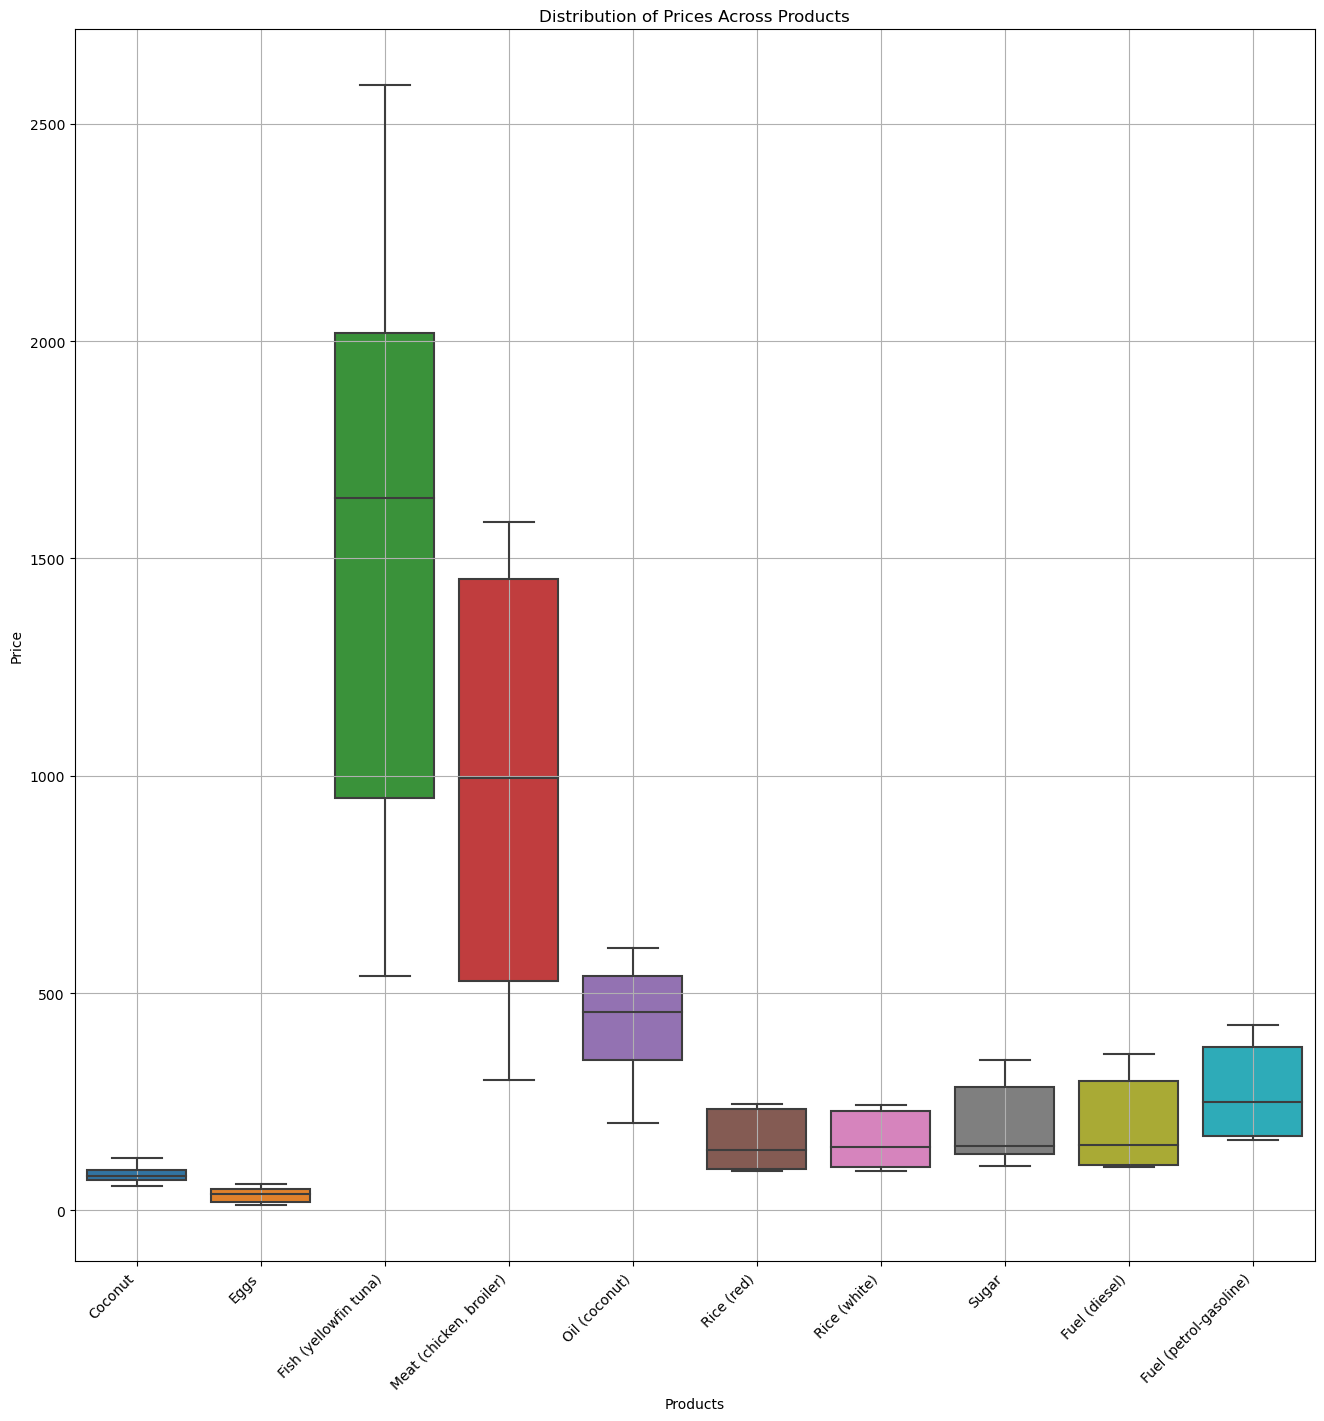

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df):
    plt.figure(figsize=(16, 16))
    sns.boxplot(data=df)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.xlabel('Products')
    plt.ylabel('Price')
    plt.title('Distribution of Prices Across Products')
    plt.grid(True)
    plt.show()

plot_boxplots(df.copy())

These are simply to understand data before putting into analysis


<br>
<br>

# Time Series Plots
Identifying the trend patterns and the price variations from 2020 to 2024 for all the items available. By looking at the time series plots generated as all the line slopes consistently upwards over time, it suggests an upward trend in the price. It is not possible to clearly identify seasonality or seasonal trends by looking at the line graphs. Therefore, after careful inspection, most of the time series plots for the prices of food and fuel seems to be non-stationary at first glance with an Augmented-Dickey Fuller test to do a stationarity test on each item, this can be verified.

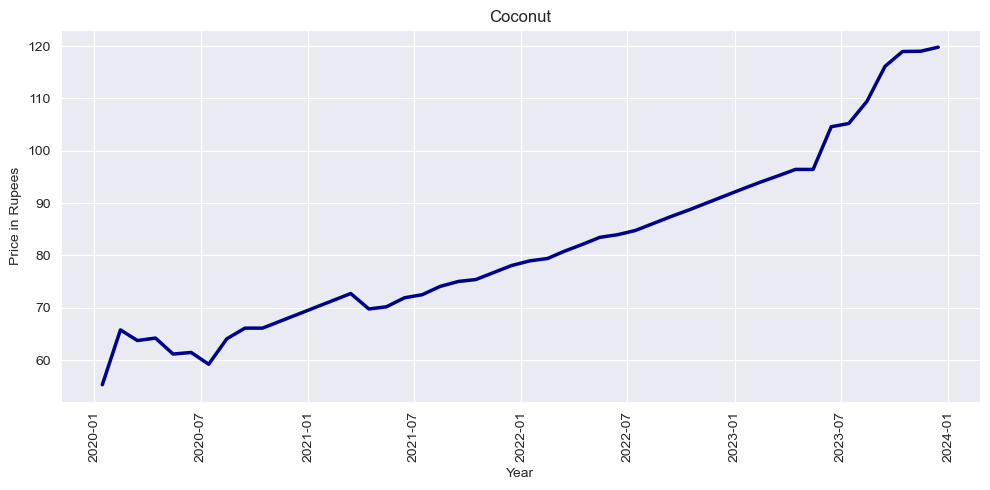

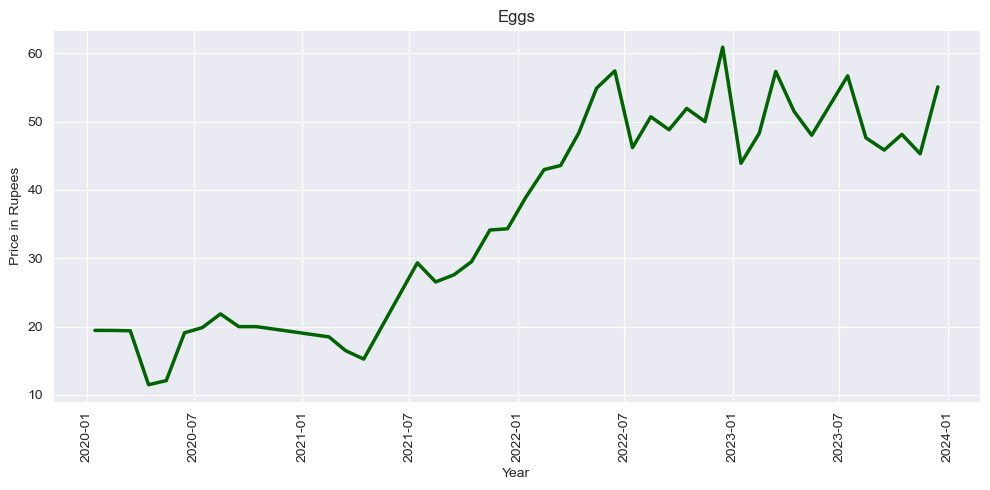

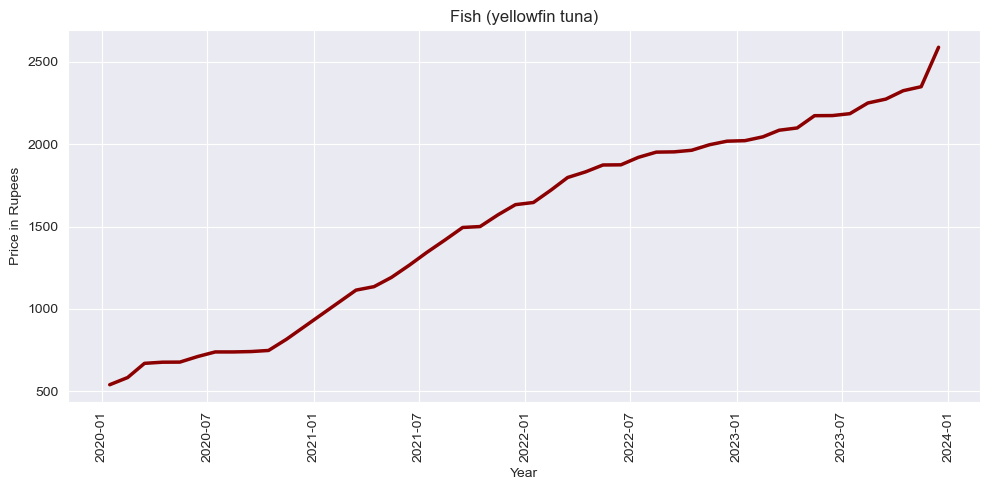

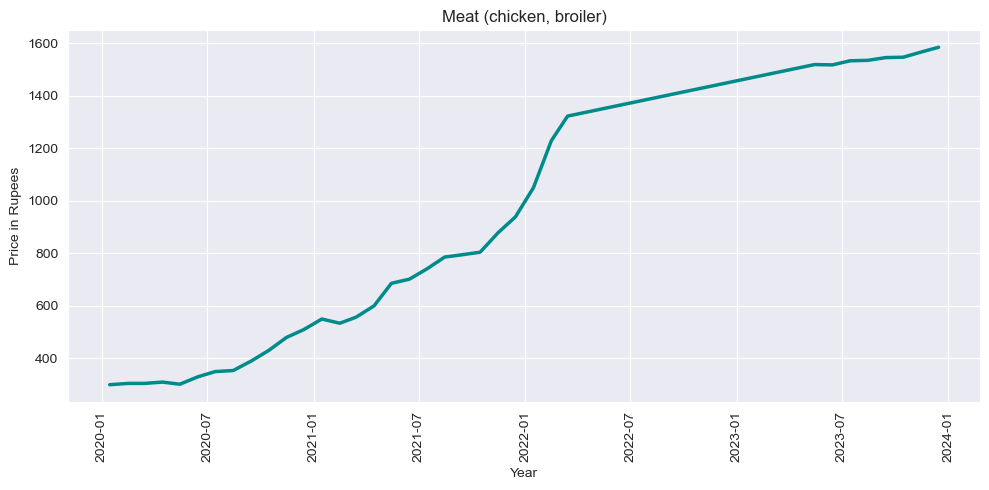

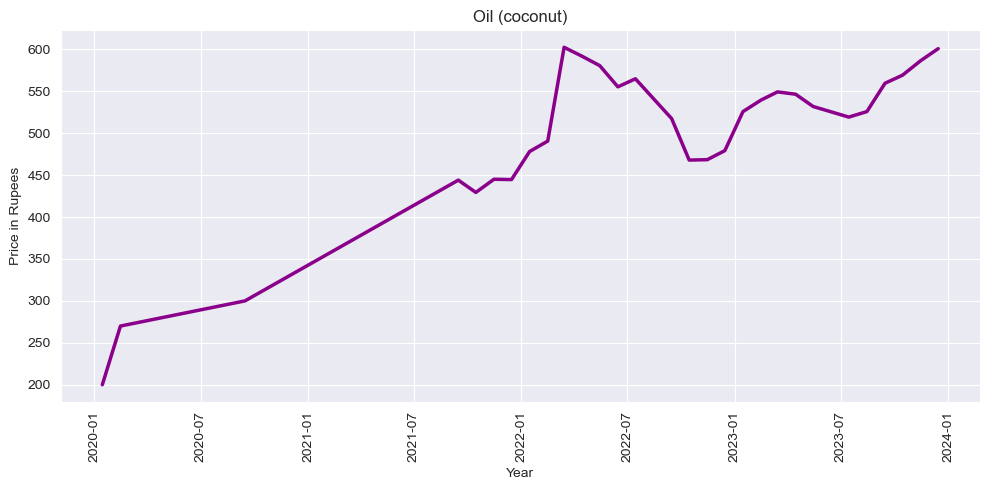

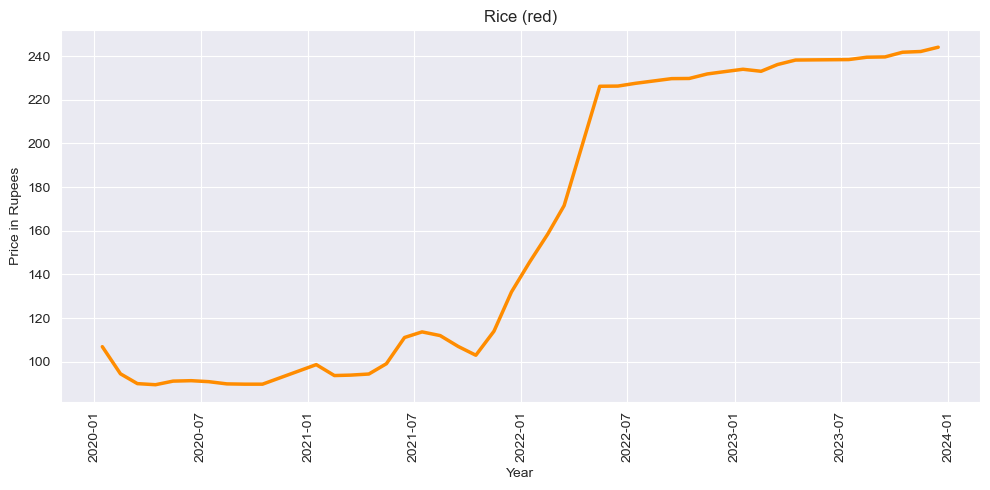

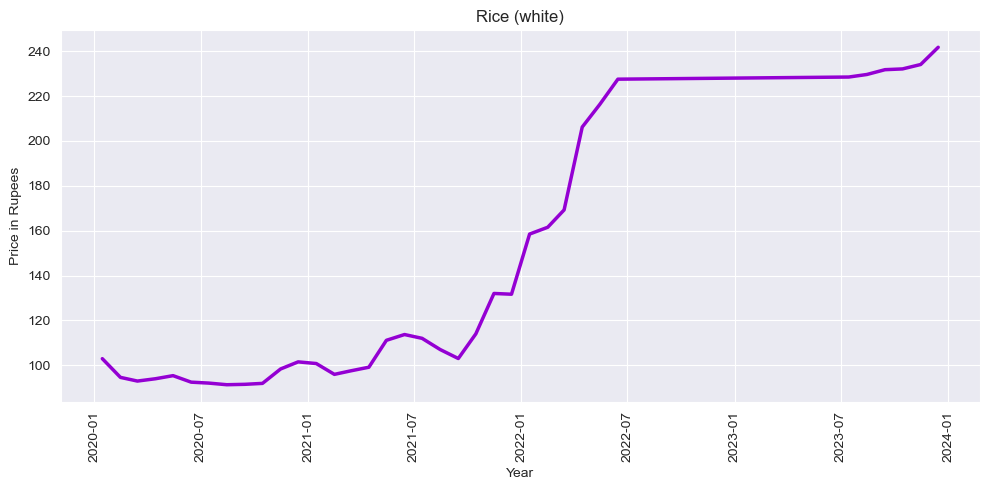

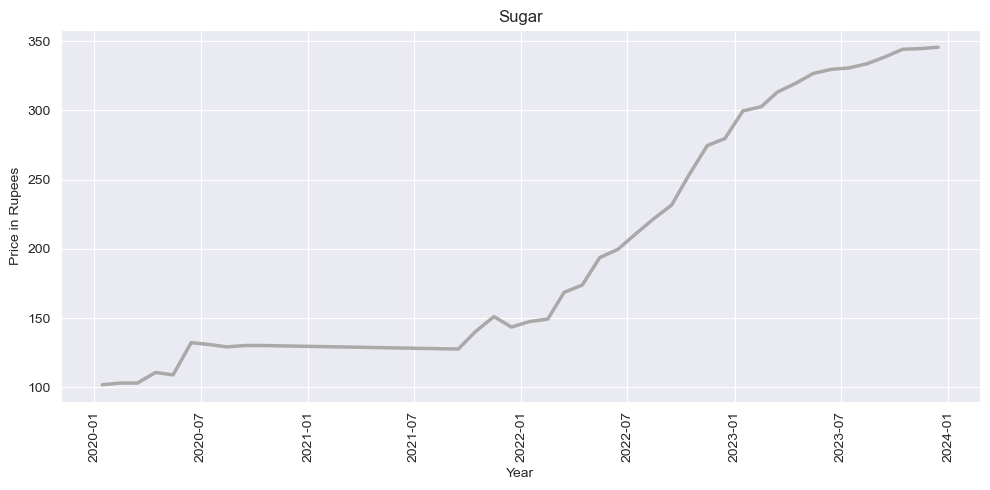

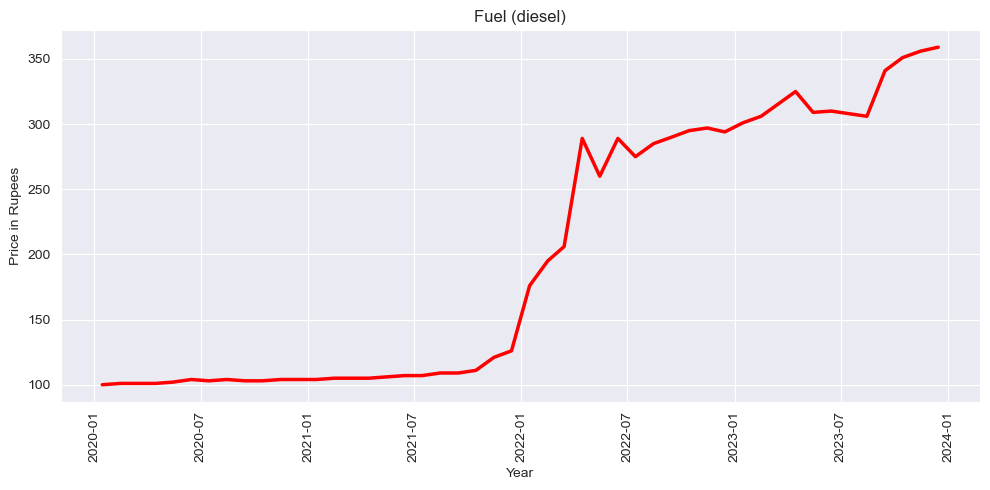

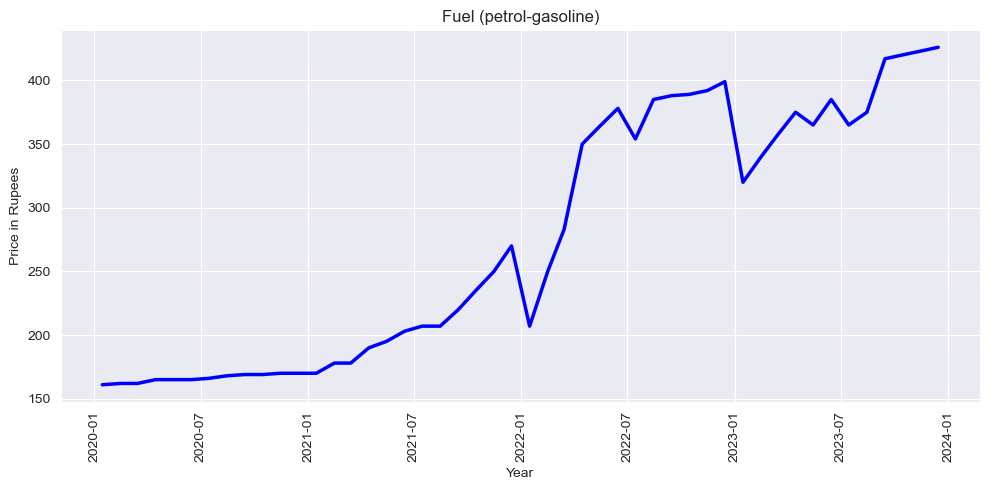

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme to "darkgrid"
sns.set_style("darkgrid")

# Colors list
colors = [
    "darkblue",
    "darkgreen",
    "darkred",
    "darkcyan",
    "darkmagenta",
    "darkorange",
    "darkviolet",
    "darkgray",
    "red",
    "blue",
]

# Loop through each column in the price data
for i, column in enumerate(df.columns):
    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=(10, 5))

    # Create a line plot with Seaborn
    sns.lineplot(
        data=df[column],
        linewidth=2.5,
        color=colors[i % len(colors)],
    )

    # Set labels and title for the plot
    ax.set_xlabel("Year")
    ax.set_ylabel("Price in Rupees")
    ax.set_title(column)

    # Rotate x-axis tick labels for readability
    plt.xticks(rotation=90)

    # Adjust layout for better visualization
    plt.tight_layout()

    # Close the plot to avoid memory issues
    plt.show()

<br>
<br>

# Identifying the Price Trend
Confirming the upward price trend by performing a straightforward linear regression on each column of the DataFrame to predict the direction of the price


In [9]:
from sklearn.linear_model import LinearRegression

for column in df.columns:
    X = pd.to_datetime(df.index)  # Convert index to datetime objects
    X = X.values.reshape(-1, 1)  # Reshape X values
    y = df[column].dropna()  # Remove rows with NaN values
    X = X[:len(y)]  # Filter X to have the same number of samples as y
    model = LinearRegression().fit(X, y)

    # Step 3: Use the coefficients to determine the direction
    direction = 'Up' if model.coef_ > 0 else 'Down'

    print(f"{column} price direction: {direction}")

Coconut price direction: Up
Eggs price direction: Up
Fish (yellowfin tuna) price direction: Up
Meat (chicken, broiler) price direction: Up
Oil (coconut) price direction: Up
Rice (red) price direction: Up
Rice (white) price direction: Up
Sugar price direction: Up
Fuel (diesel) price direction: Up
Fuel (petrol-gasoline) price direction: Up


And it shows all the price directions are upwards. So, we can have a simple thought that 
all the 10 items have an upward price Trend.

<br>

# Dataset splitting
It is necessary to divide the pricing dataset into train and test sets. This is an essential phase in the research process to guarantee that the model can be evaluated properly using anticipated and actual data, and to avoid overfitting of the models.

In [10]:
# Calculate the index to split the data
split_index = int(len(df) * 0.8)

# Split the data into training and testing sets
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Print the shapes of the training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (38, 10)
Testing set shape: (10, 10)


<br>
<br>

# Correlation analysis

### Scatter plot visualization
the correlation analysis between fuel prices and prices of various commodities such as coconut, eggs, yellowfin tuna, chicken meat, coconut oil, red rice, white rice, and sugar. Scatter plots are generated to visualize the relationship between these variables, with regression lines fitted to depict the general trend. Additionally, correlation coefficients are calculated to quantify the strength and direction of the linear relationship between fuel prices and each commodity price. Confidence intervals around the regression lines provide insights into the uncertainty of the relationship, while outliers are identified to flag data points deviating significantly from the expected pattern. This analysis helps in understanding potential associations between fluctuations in diesel fuel prices and changes in commodity prices, aiding in decision-making processes and EDA

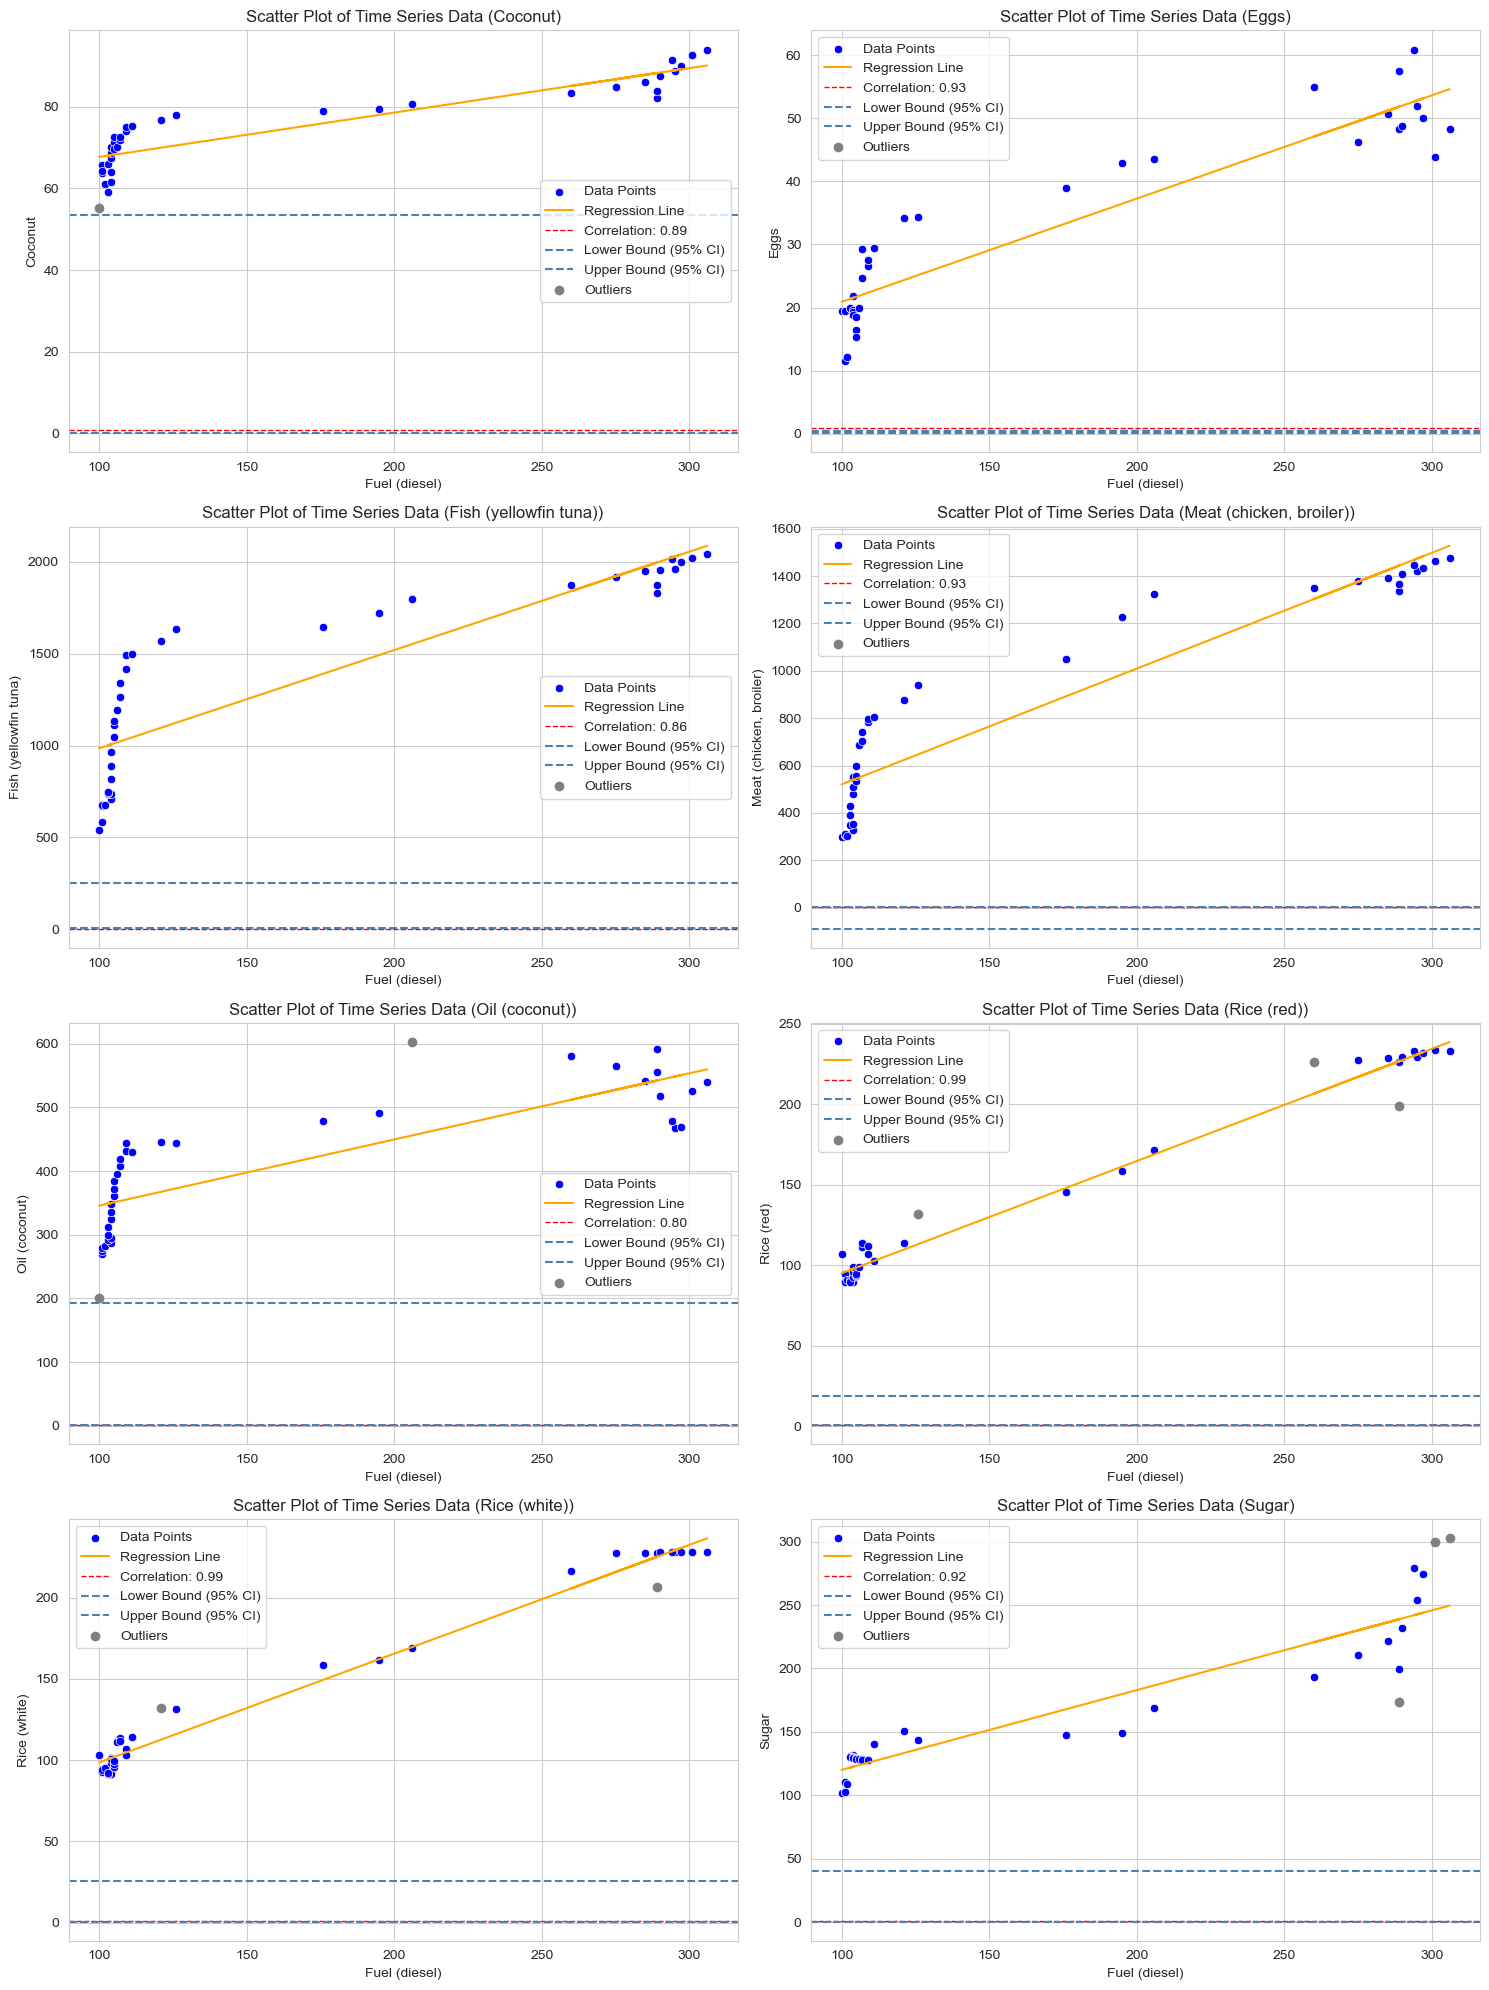

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Set seaborn style
sns.set_style("whitegrid")

# Define threshold for coloring points
threshold = 5  # Example threshold, adjust as needed

# List of columns for y-axis
y_columns = ['Coconut', 'Eggs', 'Fish (yellowfin tuna)', 'Meat (chicken, broiler)', 'Oil (coconut)','Rice (red)', 'Rice (white)', 'Sugar']

# Define number of rows and columns for subplots
num_rows = 4
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Plot scatter plots for each column in y_columns
for i, y_col in enumerate(y_columns):
    # Calculate subplot index
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Plot scatter plot with seaborn
    sns.scatterplot(data=train_df, x='Fuel (diesel)', y=y_col, ax=axes[row_index, col_index], color='blue', label='Data Points')
    
    # Fit regression line
    X = sm.add_constant(train_df['Fuel (diesel)'])
    model = sm.OLS(train_df[y_col], X)
    results = model.fit()
    line = results.params['const'] + results.params['Fuel (diesel)'] * train_df['Fuel (diesel)']
    axes[row_index, col_index].plot(train_df['Fuel (diesel)'], line, color='orange', label='Regression Line')
    
    # Calculate confidence interval
    conf_interval = results.conf_int(alpha=0.05)

    # Calculate correlation coefficient between 'Fuel (diesel)' and y_col
    correlation_coefficient = train_df['Fuel (diesel)'].corr(train_df[y_col])
    
    # Add horizontal line for correlation
    axes[row_index, col_index].axhline(y=correlation_coefficient, color='red', linestyle='--', linewidth=1, label=f'Correlation: {correlation_coefficient:.2f}')
    
    # Plot confidence interval
    axes[row_index, col_index].axhline(y=conf_interval.iloc[0, 0], color='steelblue', linestyle='--', label='Lower Bound (95% CI)')
    axes[row_index, col_index].axhline(y=conf_interval.iloc[1, 0], color='steelblue', linestyle='--', label='Upper Bound (95% CI)')

    
    # Detect outliers
    # Calculate residuals for each point
    residuals = results.resid

    # Detect outliers based on residuals
    outliers = np.abs(residuals) > 2 * residuals.std()

    # Plot outliers
    axes[row_index, col_index].scatter(train_df.loc[outliers, 'Fuel (diesel)'], train_df.loc[outliers, y_col], color='grey', label='Outliers')

        
    # Set subplot title and labels
    axes[row_index, col_index].set_title(f'Scatter Plot of Time Series Data ({y_col})')
    axes[row_index, col_index].set_xlabel('Fuel (diesel)')
    axes[row_index, col_index].set_ylabel(y_col)
        
    # Add legend
    axes[row_index, col_index].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


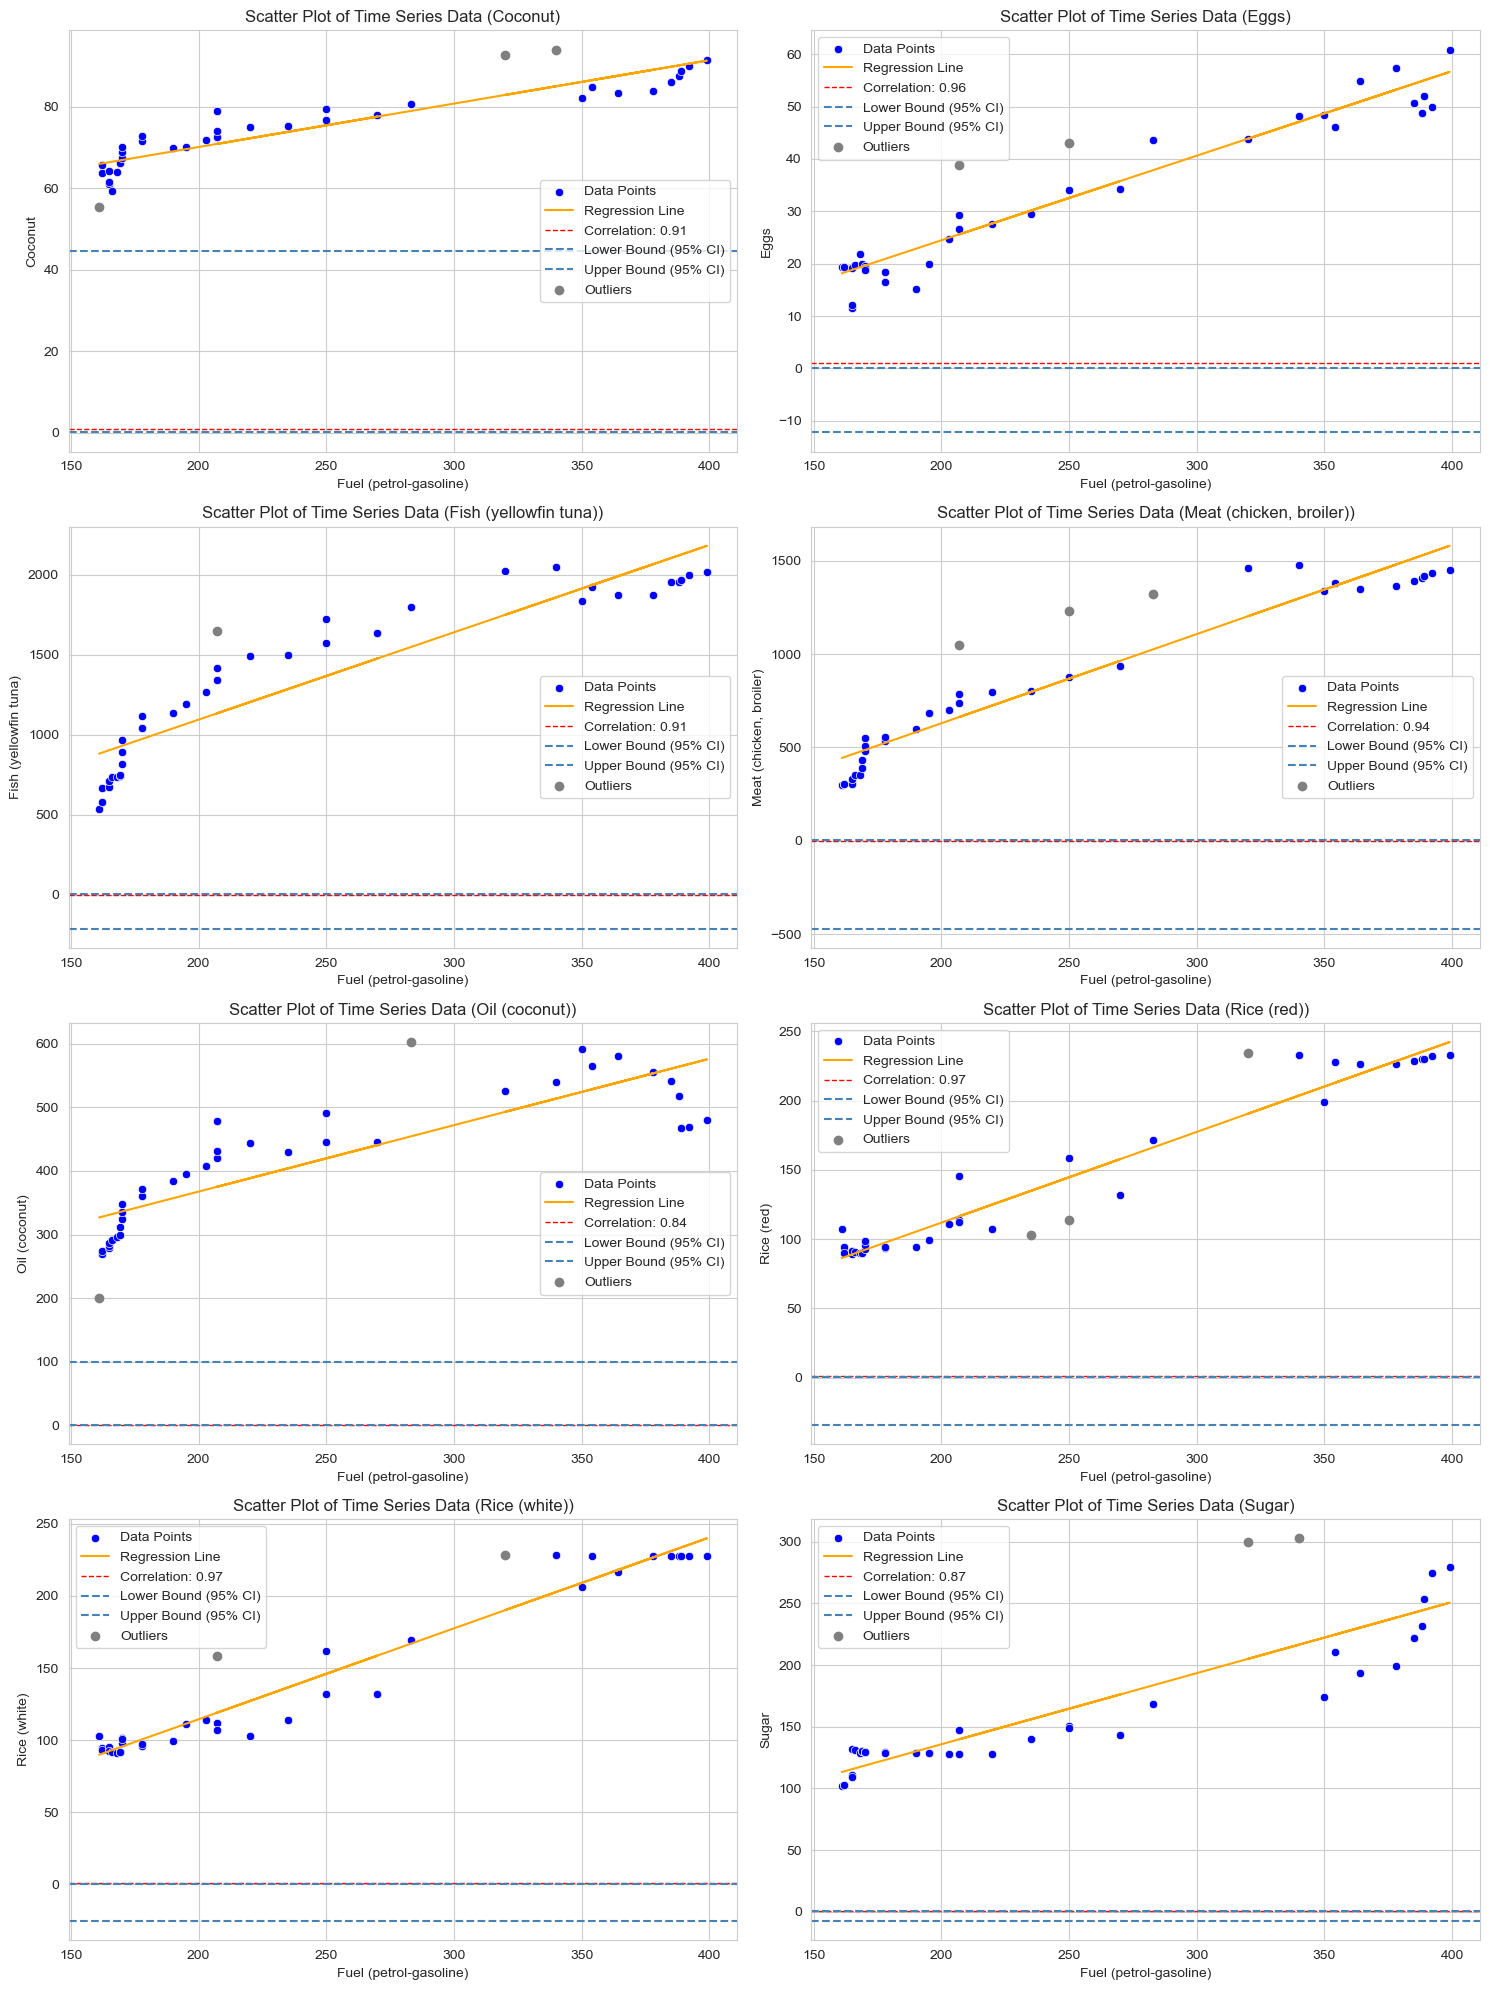

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Set seaborn style
sns.set_style("whitegrid")

# Define threshold for coloring points
threshold = 5  # Example threshold, adjust as needed

# List of columns for y-axis
y_columns = ['Coconut', 'Eggs', 'Fish (yellowfin tuna)', 'Meat (chicken, broiler)', 'Oil (coconut)','Rice (red)', 'Rice (white)', 'Sugar']

# Define number of rows and columns for subplots
num_rows = 4
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Plot scatter plots for each column in y_columns
for i, y_col in enumerate(y_columns):
    # Calculate subplot index
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Plot scatter plot with seaborn
    sns.scatterplot(data=train_df, x='Fuel (petrol-gasoline)', y=y_col, ax=axes[row_index, col_index], color='blue', label='Data Points')
    
    # Fit regression line
    X = sm.add_constant(train_df['Fuel (petrol-gasoline)'])
    model = sm.OLS(train_df[y_col], X)
    results = model.fit()
    line = results.params['const'] + results.params['Fuel (petrol-gasoline)'] * train_df['Fuel (petrol-gasoline)']
    axes[row_index, col_index].plot(train_df['Fuel (petrol-gasoline)'], line, color='orange', label='Regression Line')
    
    # Calculate confidence interval
    conf_interval = results.conf_int(alpha=0.05)

    # Calculate correlation coefficient between 'Fuel (diesel)' and y_col
    correlation_coefficient = train_df['Fuel (petrol-gasoline)'].corr(train_df[y_col])
    
    # Add horizontal line for correlation
    axes[row_index, col_index].axhline(y=correlation_coefficient, color='red', linestyle='--', linewidth=1, label=f'Correlation: {correlation_coefficient:.2f}')
    
    # Plot confidence interval
    axes[row_index, col_index].axhline(y=conf_interval.iloc[0, 0], color='steelblue', linestyle='--', label='Lower Bound (95% CI)')
    axes[row_index, col_index].axhline(y=conf_interval.iloc[1, 0], color='steelblue', linestyle='--', label='Upper Bound (95% CI)')

    
    # Detect outliers
    # Calculate residuals for each point
    residuals = results.resid

    # Detect outliers based on residuals
    outliers = np.abs(residuals) > 2 * residuals.std()

    # Plot outliers
    axes[row_index, col_index].scatter(train_df.loc[outliers, 'Fuel (petrol-gasoline)'], train_df.loc[outliers, y_col], color='grey', label='Outliers')

        
    # Set subplot title and labels
    axes[row_index, col_index].set_title(f'Scatter Plot of Time Series Data ({y_col})')
    axes[row_index, col_index].set_xlabel('Fuel (petrol-gasoline)')
    axes[row_index, col_index].set_ylabel(y_col)
        
    # Add legend
    axes[row_index, col_index].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


These scatter plots provide a visual representation of how the prices of these ten 
essential products have changed over a period of days. By examining the slope and 
position of the regression line, we can get a sense of whether the price tends to increase 
or decrease over time, and how strong that trend is. The correlation coefficient provides 
a more precise measure of this linear relationship. Outliers may indicate unusual events 
or data collection errors that require further investigation

<br>

### Correlation coefficients
The correlation analysis reveals strong positive correlations between diesel fuel prices and prices of various commodities, including coconut, eggs, yellowfin tuna, chicken meat, coconut oil, red rice, white rice, and sugar. Specifically, diesel fuel prices exhibit notably high correlations with red and white rice prices, with coefficients of 0.99, indicating a nearly perfect positive linear relationship. Moreover, strong correlations are observed between petrol-gasoline prices and other commodity prices, such as eggs (0.96), red rice (0.97), and white rice (0.97). These findings suggest that fluctuations in fuel prices, particularly diesel and petrol-gasoline, may significantly influence commodity prices, highlighting the interconnectedness of energy and agricultural markets. Such insights are vital for stakeholders in making informed decisions regarding resource management, investment strategies, and market forecasting.

In [13]:
correlation_summary = {}
for y_col in y_columns:
    correlation_coefficient = train_df['Fuel (petrol-gasoline)'].corr(train_df[y_col])
    correlation_summary[y_col] = correlation_coefficient

# Print correlation coefficients
for y_col, correlation_coefficient in correlation_summary.items():
    print(f"Correlation between 'Fuel (petrol-gasoline)' and '{y_col}': {correlation_coefficient:.2f}")


Correlation between 'Fuel (petrol-gasoline)' and 'Coconut': 0.91
Correlation between 'Fuel (petrol-gasoline)' and 'Eggs': 0.96
Correlation between 'Fuel (petrol-gasoline)' and 'Fish (yellowfin tuna)': 0.91
Correlation between 'Fuel (petrol-gasoline)' and 'Meat (chicken, broiler)': 0.94
Correlation between 'Fuel (petrol-gasoline)' and 'Oil (coconut)': 0.84
Correlation between 'Fuel (petrol-gasoline)' and 'Rice (red)': 0.97
Correlation between 'Fuel (petrol-gasoline)' and 'Rice (white)': 0.97
Correlation between 'Fuel (petrol-gasoline)' and 'Sugar': 0.87


In [14]:
# Calculate correlation coefficients
correlation_summary = {}
for y_col in y_columns:
    correlation_coefficient = train_df['Fuel (diesel)'].corr(train_df[y_col])
    correlation_summary[y_col] = correlation_coefficient

# Print correlation coefficients
for y_col, correlation_coefficient in correlation_summary.items():
    print(f"Correlation between 'Fuel (diesel)' and '{y_col}': {correlation_coefficient:.2f}")


Correlation between 'Fuel (diesel)' and 'Coconut': 0.89
Correlation between 'Fuel (diesel)' and 'Eggs': 0.93
Correlation between 'Fuel (diesel)' and 'Fish (yellowfin tuna)': 0.86
Correlation between 'Fuel (diesel)' and 'Meat (chicken, broiler)': 0.93
Correlation between 'Fuel (diesel)' and 'Oil (coconut)': 0.80
Correlation between 'Fuel (diesel)' and 'Rice (red)': 0.99
Correlation between 'Fuel (diesel)' and 'Rice (white)': 0.99
Correlation between 'Fuel (diesel)' and 'Sugar': 0.92


<br>

### Heatmap visualization
this summarizes the correlation coefficients between different pairs of variables, allowing for quick identification of strong and weak correlations.

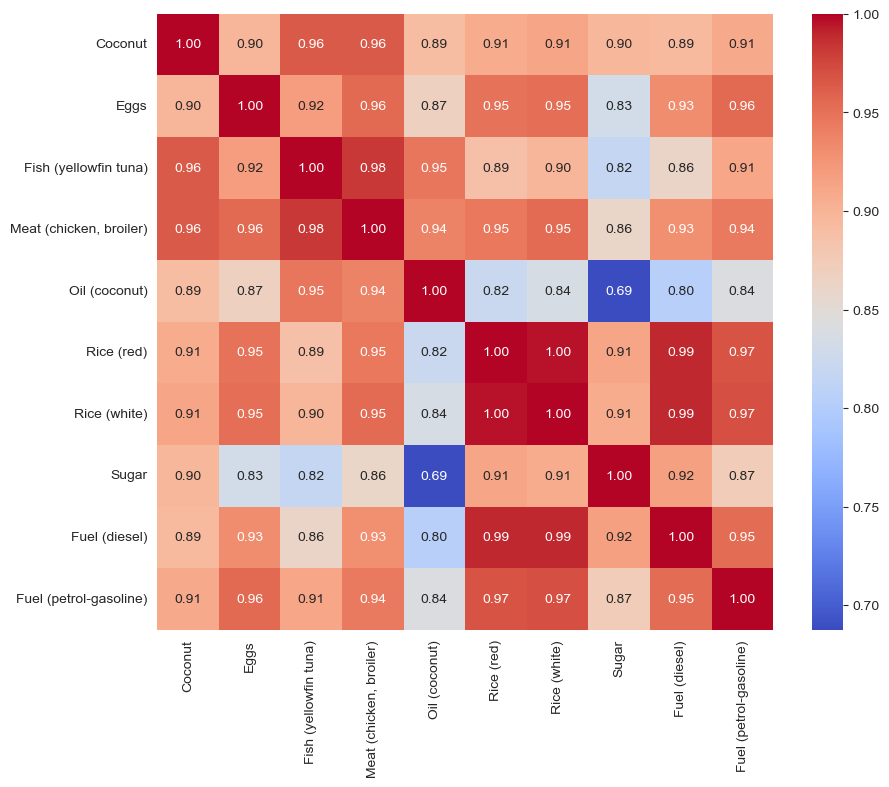

In [15]:
# Calculate the correlation matrix
corr = train_df.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.show()

<br>

### Spearman's correlation coefficients
The Spearman's correlation coefficients between 'Fuel (petrol-gasoline)' and various commodities, ranging from 0.82 to 0.97, indicate the strength and direction of monotonic relationships between these variables. Unlike Pearson's correlation, Spearman's correlation assesses the strength and direction of monotonic relationships, making it suitable for analyzing non-linear associations or ordinal data. Similarly, the Spearman's correlation coefficients between 'Fuel (diesel)' and commodities also exhibit strong relationships, ranging from 0.85 to 0.99. These correlations provide insights into how the prices of petrol-gasoline and diesel correlate with other commodities, aiding in understanding potential market dynamics and dependencies. Overall, Spearman's correlation offers a robust measure of association, particularly useful when dealing with variables with non-linear relationships or when ordinal data is involved



In [16]:
# Calculate Spearman's correlation coefficients
spearman_summary = {}
for y_col in y_columns:
    spearman_coefficient = train_df['Fuel (petrol-gasoline)'].corr(train_df[y_col], method='spearman')
    spearman_summary[y_col] = spearman_coefficient

# Print Spearman's correlation coefficients
for y_col, spearman_coefficient in spearman_summary.items():
    print(f"Spearman's correlation between 'Fuel (petrol-gasoline)' and '{y_col}': {spearman_coefficient:.2f}")


Spearman's correlation between 'Fuel (petrol-gasoline)' and 'Coconut': 0.96
Spearman's correlation between 'Fuel (petrol-gasoline)' and 'Eggs': 0.90
Spearman's correlation between 'Fuel (petrol-gasoline)' and 'Fish (yellowfin tuna)': 0.97
Spearman's correlation between 'Fuel (petrol-gasoline)' and 'Meat (chicken, broiler)': 0.97
Spearman's correlation between 'Fuel (petrol-gasoline)' and 'Oil (coconut)': 0.93
Spearman's correlation between 'Fuel (petrol-gasoline)' and 'Rice (red)': 0.90
Spearman's correlation between 'Fuel (petrol-gasoline)' and 'Rice (white)': 0.91
Spearman's correlation between 'Fuel (petrol-gasoline)' and 'Sugar': 0.82


In [17]:
# Calculate Spearman's correlation coefficients
spearman_summary = {}
for y_col in y_columns:
    spearman_coefficient = train_df['Fuel (diesel)'].corr(train_df[y_col], method='spearman')
    spearman_summary[y_col] = spearman_coefficient

# Print Spearman's correlation coefficients
for y_col, spearman_coefficient in spearman_summary.items():
    print(f"Spearman's correlation between 'Fuel (diesel)' and '{y_col}': {spearman_coefficient:.2f}")


Spearman's correlation between 'Fuel (diesel)' and 'Coconut': 0.98
Spearman's correlation between 'Fuel (diesel)' and 'Eggs': 0.88
Spearman's correlation between 'Fuel (diesel)' and 'Fish (yellowfin tuna)': 0.99
Spearman's correlation between 'Fuel (diesel)' and 'Meat (chicken, broiler)': 0.99
Spearman's correlation between 'Fuel (diesel)' and 'Oil (coconut)': 0.93
Spearman's correlation between 'Fuel (diesel)' and 'Rice (red)': 0.93
Spearman's correlation between 'Fuel (diesel)' and 'Rice (white)': 0.93
Spearman's correlation between 'Fuel (diesel)' and 'Sugar': 0.85


<br>
<br>

# Checking the Stationarity of the time series
## ADF testing
If the p value is less than 0.05 therefore the p values are statistically siginificant and therefore, we can reject the null hypothesis and confirm that the series is stationary. It is not possible to deem the serires stationary soley based on the resultas of the ADF test. 
The results of the ADF (Augmented Dickey-Fuller) test for various food and fuel commodities in Colombo, Sri Lanka show that most of the time series data are non-stationary. This means the data has a trend or seasonality over time, and its statistical properties (like mean and variance) are not constant. Only Fish (yellowfin tuna) prices show stationarity, The other all commodities are likely require further transformations (differencing) to make them stationary for better forecasting.

In [18]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def perform_adf_test(series, column_name):
    try:
        result = adfuller(series, autolag='AIC')

        print(f"ADF Test Results for {column_name}:")
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        
        if result[0] < result[4]["5%"]:
            print("Reject Ho - Time Series is Stationary")
        else:
            print("Failed to Reject Ho - Time Series is Non-Stationary")
        print()
    
    except Exception as e:
        print(f"Error occurred while performing ADF test for {column_name}: {e}")

# Assuming train_df is your DataFrame containing time series data
for column in train_df.columns:
    perform_adf_test(train_df[column], column)


ADF Test Results for Coconut:
ADF Statistic: 3.004959
p-value: 1.000000
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
Failed to Reject Ho - Time Series is Non-Stationary

ADF Test Results for Eggs:
ADF Statistic: -1.147691
p-value: 0.695684
Critical Values:
	1%: -3.661
	5%: -2.961
	10%: -2.619
Failed to Reject Ho - Time Series is Non-Stationary

ADF Test Results for Fish (yellowfin tuna):
ADF Statistic: -3.035691
p-value: 0.031693
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
Reject Ho - Time Series is Stationary

ADF Test Results for Meat (chicken, broiler):
ADF Statistic: -0.457590
p-value: 0.900030
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612
Failed to Reject Ho - Time Series is Non-Stationary

ADF Test Results for Oil (coconut):
ADF Statistic: -1.688497
p-value: 0.437049
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Failed to Reject Ho - Time Series is Non-Stationary

ADF Test Results for Rice (red):
ADF Statistic: -0.687784
p-value: 0.849888
Critic

These findings show that, at the 1%, 5%, and 10% significance levels, the ADF statistic for prices are much smaller than the critical values. The crucial values serve as a threshold that may be used to gauge how confidently the null hypothesis is being rejected. There exists substantial evidence to reject the null hypothesis, since the test statistic is considerably less than the critical values at the corresponding confidence levels. Furthermore, in hypothesis testing, the p value is used to calculate the likelihood of rejecting the null hypothesis. A tiny p-value, or more specifically, a significant p-value (often less than 0.05), offers substantial support for rejecting the null hypothesis. Therefore, it is not possible to definitively reject the null hypothesis that all of the dataset's attributes exist, based on these findings.
In conclusion, our ADF test suggests that there is non-stationarity in all food and fuel time series spanning from 2020 to 2024 except Fish (yellowfin tuna)


<br>
<br>

# Differencing the Data
Differencing involves subtracting the previous value from the current value in the time series. You can perform differencing until the data becomes stationary (indicated by a p-value less than 0.05 in the ADF test). Only Fish (yellowfin tuna) prices were stationary without differencing. Meat, Oil, Rice (both types), and Fuel (petrol) became stationary after one round of differencing (removing trends).  For Coconut, Eggs, Sugar, and Diesel fuel, two rounds of differencing were needed to achieve stationarity.

In [19]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def is_stationary(series):
    result = adf_test(series)
    return result['pvalue'] < 0.05

def adf_test(series):
    result = adfuller(series)
    return {'stat': result[0], 'pvalue': result[1], 'lags': result[2], 'critical_values': result[4]}

def perform_differencing(series):
    d = 0
    while not is_stationary(series):
        series = series.diff().dropna()
        d += 1
        if d == 2:
            break
    return series, d

# Store the results
stationary_before_diff = {}
stationary_after_diff_once = {}
stationary_after_diff_twice = {}

# Iterate over each product in train_df
for product in train_df.columns:
    series = train_df[product].copy()
    series_before_diff = series.copy()
    
    # Perform differencing until stationary
    series_after_diff, d = perform_differencing(series)
    
    # Store the results
    if d == 0:
        stationary_before_diff[product] = series_before_diff
    elif d == 1:
        stationary_after_diff_once[product] = series_after_diff
    elif d == 2:
        stationary_after_diff_twice[product] = series_after_diff

# Print the results
print("Stationary before differencing:")
for product, series in stationary_before_diff.items():
    print(f"--- {product} ---")
    print()

print("Stationary after differencing once:")
for product, series in stationary_after_diff_once.items():
    print(f"--- {product} ---")
    print()

print("Stationary after differencing twice:")
for product, series in stationary_after_diff_twice.items():
    print(f"--- {product} ---")
    print()


Stationary before differencing:
--- Fish (yellowfin tuna) ---

Stationary after differencing once:
--- Meat (chicken, broiler) ---

--- Oil (coconut) ---

--- Rice (red) ---

--- Rice (white) ---

--- Fuel (petrol-gasoline) ---

Stationary after differencing twice:
--- Coconut ---

--- Eggs ---

--- Sugar ---

--- Fuel (diesel) ---



<br>

Making a new training dataset with the differenced data from the original non stationary data in train_df

In [20]:
# Create a new DataFrame to store stationary time series data
stationary_train_df = pd.DataFrame()

# Add stationary time series before differencing to the DataFrame
for product, series in stationary_before_diff.items():
    stationary_train_df[f"{product}"] = series

# Add stationary time series after differencing once to the DataFrame
for product, series in stationary_after_diff_once.items():
    stationary_train_df[f"{product}"] = series

# Add stationary time series after differencing twice to the DataFrame
for product, series in stationary_after_diff_twice.items():
    stationary_train_df[f"{product}"] = series

stationary_train_df = stationary_train_df.dropna() 

# Display the new DataFrame
stationary_train_df.head(4)

,Fish (yellowfin tuna),"Meat (chicken, broiler)",Oil (coconut),Rice (red),Rice (white),Fuel (petrol-gasoline),Coconut,Eggs,Sugar,Fuel (diesel)
date,,,,,,,,,,
2020-03-15,669.2225,0.0,4.084507,-4.50,-1.642500,0.0,-12.5000,-0.04,-1.190,-1.0
2020-04-15,676.1900,5.0,4.366197,-0.50,1.036667,3.0,2.5000,-7.84,7.670,0.0
2020-05-15,676.7800,-8.0,4.225352,1.65,1.373333,0.0,-3.5200,8.49,-9.420,1.0
2020-06-15,710.8350,28.0,4.366197,0.20,-2.897500,0.0,3.3525,6.40,25.005,1.0


<br>
<br>

Since the train data was differenced until stationarity was attained. The test data should also be differnced in accordance to the train data. 

In [21]:
stationary_test_df = pd.DataFrame()

stationary_test_df['Meat (chicken, broiler)'] = test_df['Meat (chicken, broiler)'].diff().copy()
stationary_test_df.loc[:, 'Oil (coconut)'] = test_df['Oil (coconut)'].diff().copy()
stationary_test_df.loc[:, 'Rice (red)'] = test_df['Rice (red)'].diff().copy()
stationary_test_df.loc[:, 'Rice (white)'] = test_df['Rice (white)'].diff().copy()
stationary_test_df.loc[:, 'Fuel (petrol-gasoline)'] = test_df['Fuel (petrol-gasoline)'].diff().copy()

stationary_test_df.loc[:, 'Coconut'] = test_df['Coconut'].diff().diff().copy()
stationary_test_df.loc[:, 'Eggs'] = test_df['Eggs'].diff().diff().copy()
stationary_test_df.loc[:, 'Sugar'] = test_df['Sugar'].diff().diff().copy()
stationary_test_df.loc[:, 'Fuel (diesel)'] = test_df['Fuel (diesel)'].diff().diff().copy()

stationary_test_df.loc[:, 'Fish (yellowfin tuna)'] = test_df['Fish (yellowfin tuna)'].copy()

stationary_test_df = stationary_test_df.fillna(stationary_test_df.mean())
stationary_test_df


,"Meat (chicken, broiler)",Oil (coconut),Rice (red),Rice (white),Fuel (petrol-gasoline),Coconut,Eggs,Sugar,Fuel (diesel),Fish (yellowfin tuna)
date,,,,,,,,,,
2023-03-15,10.432010,5.735556,0.883089,1.506359,7.666667,-0.0625,1.953162,-0.6625,-0.875,2085.000000
2023-04-15,14.262346,-2.730000,2.067541,0.074778,18.000000,-0.0625,1.953162,-0.6625,-0.875,2098.710243
2023-05-15,13.802271,-14.650000,0.074778,0.072365,-10.000000,-1.2700,2.330000,0.8000,-26.000,2173.311262
2023-06-15,-1.090182,-6.428689,0.072365,0.074778,20.000000,8.1500,7.917782,-4.1000,17.000,2174.057813
2023-07-15,15.352528,-6.221312,0.074778,0.072365,-20.000000,-7.5300,-0.142509,-2.0000,-3.000,2185.560000
2023-08-15,1.937766,6.550000,1.072365,1.137812,10.000000,3.6000,-13.353329,2.0000,0.000,2250.398981
2023-09-15,10.392369,33.810000,0.137812,2.142500,42.000000,2.4700,7.298889,2.0000,37.000,2274.015938
2023-10-15,1.472135,9.670000,2.142500,0.340699,3.000000,-3.8500,4.063333,0.5000,-25.000,2325.000000
2023-11-15,19.642587,17.270000,0.340699,1.964964,3.000000,-2.7900,-5.120343,-5.0000,-5.000,2349.354848


<br>
<br>

# Finding Hidden Patterns and Reliance in the Time Series

# ACF and PACF plots
According to the above ACF and PACF plots above we cannot identify and seasoanal patterns in all commodity types. Therefore we can confirm that seasonality is not present in all time series variables. therefore the data does not need to be further differenced. The data can be fitted in to an ARIMA model to forecast the prices. Before fittimg the ARIMA model we need to determine the best parameters to fit the model. Since we determined the data to be stationary with no seasonality there is need for differencing.  ther fore the d parameter of the Arima model shloud be kept zero(as i already did the DIfferencing and made a training set for the stationary data) and the best parameters for the p and q value should be determined.

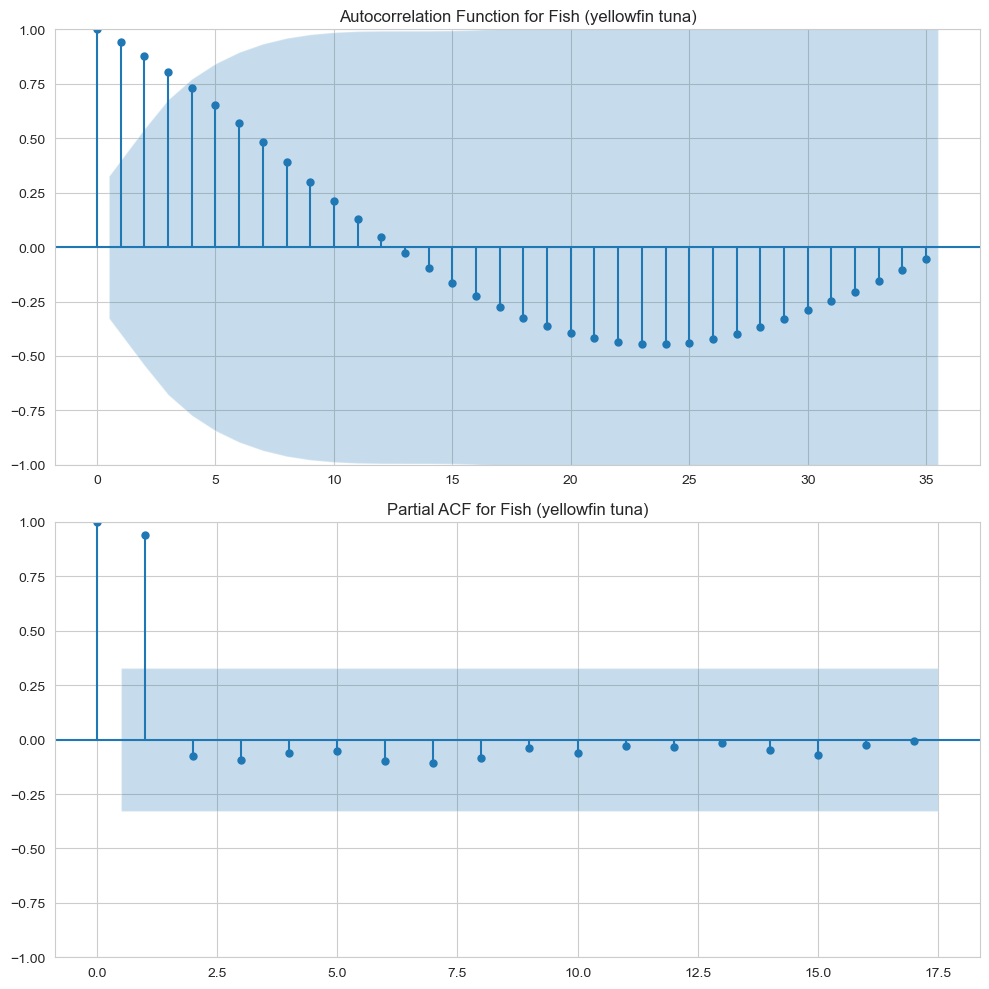

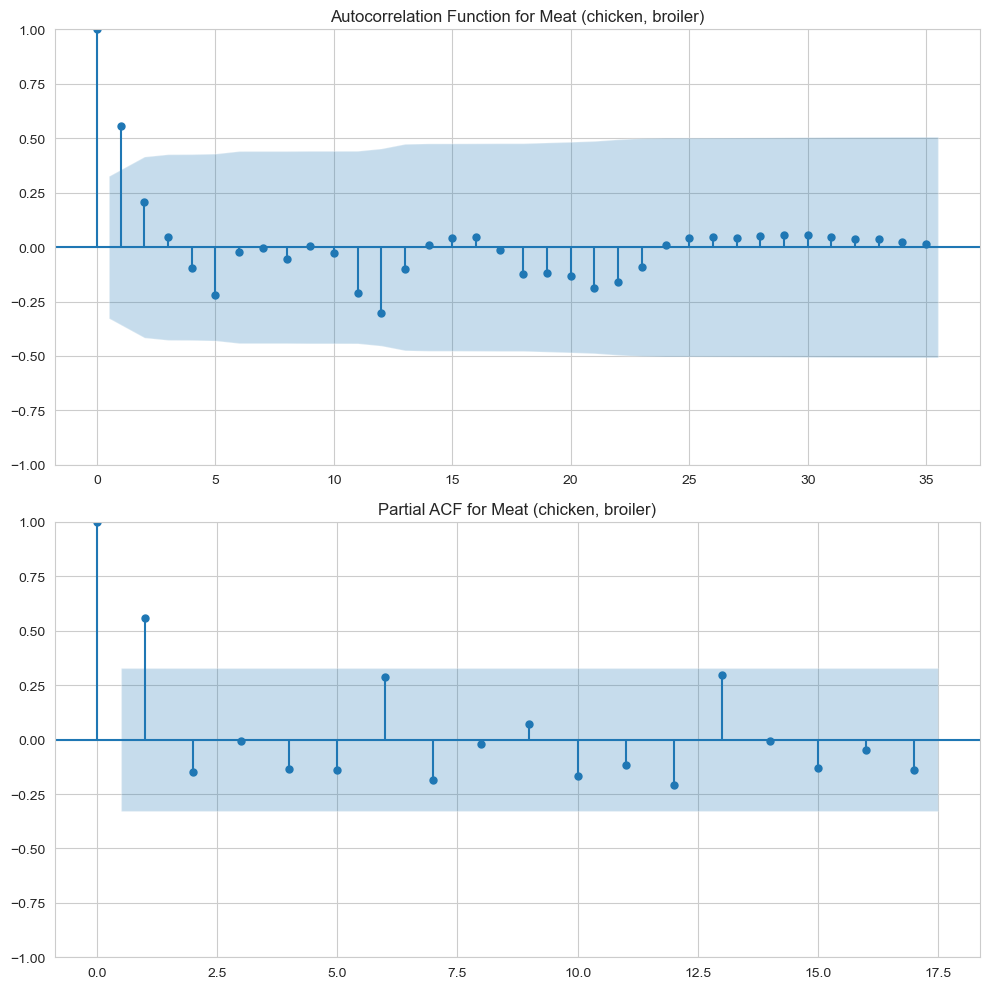

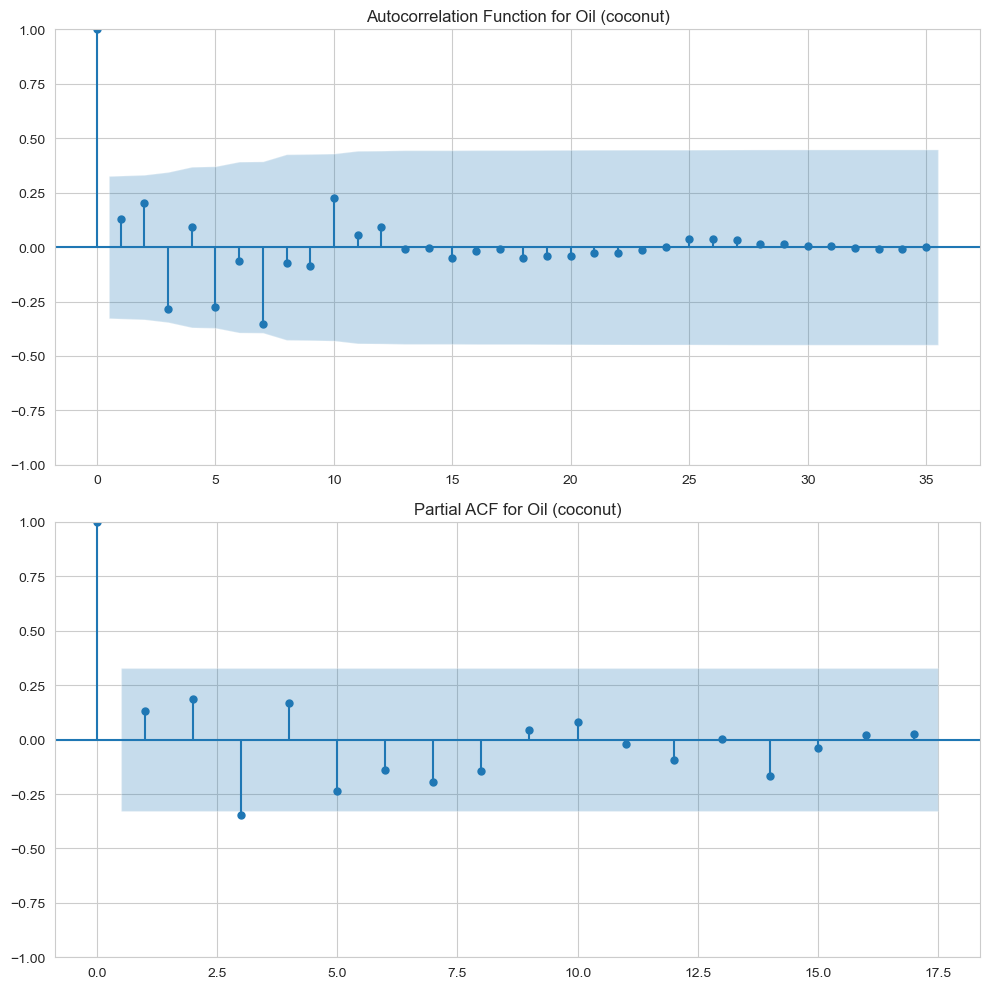

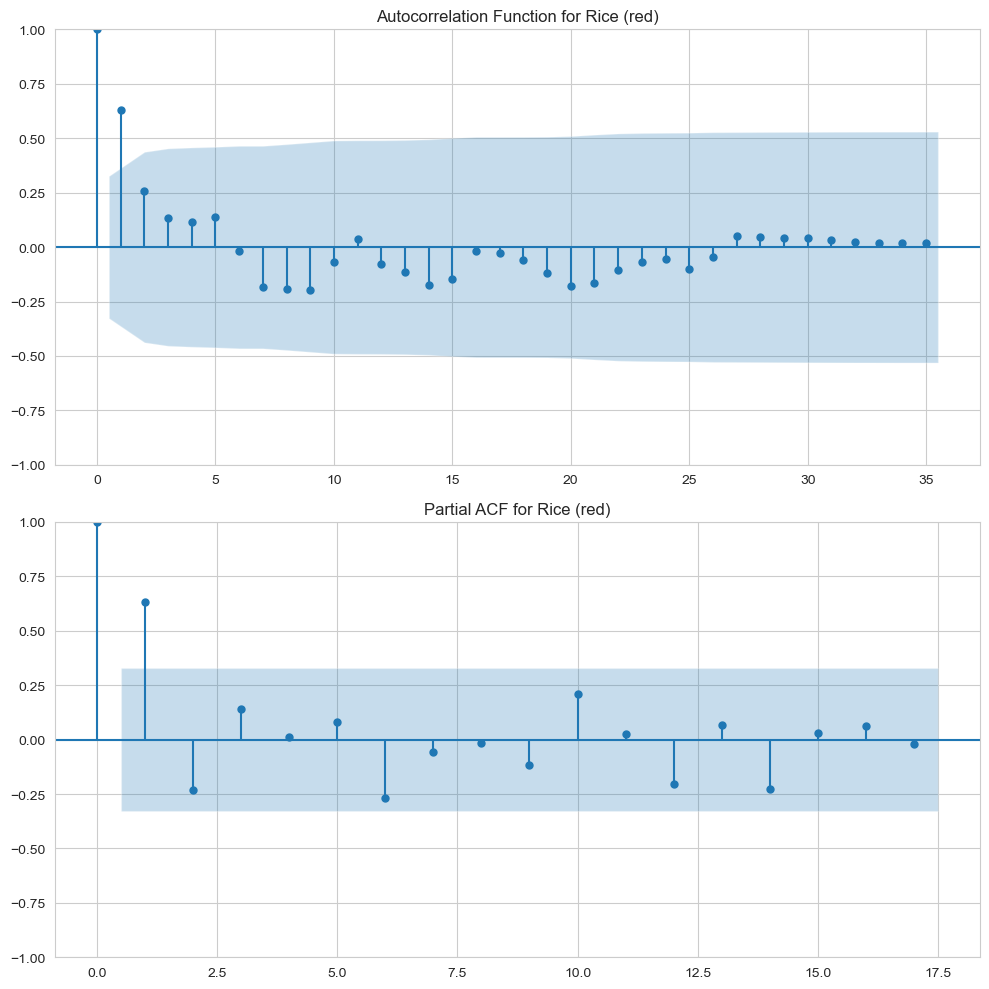

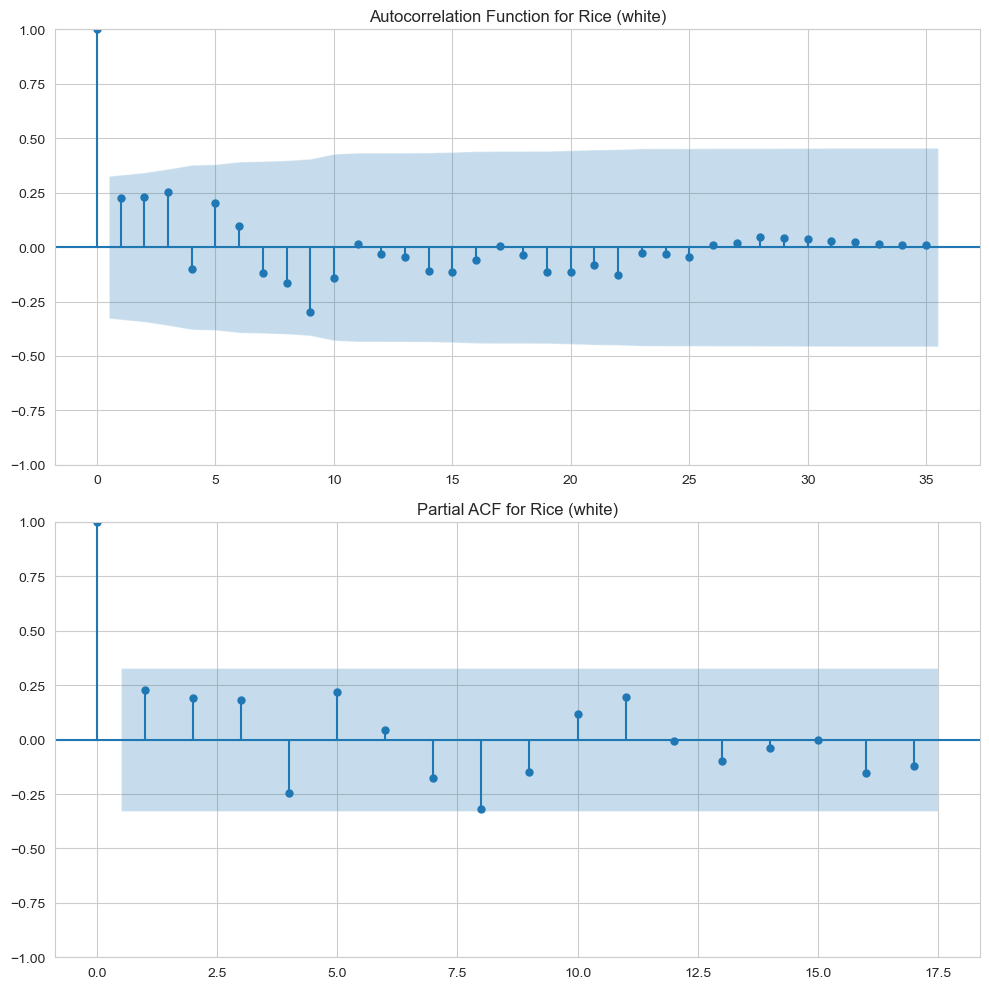

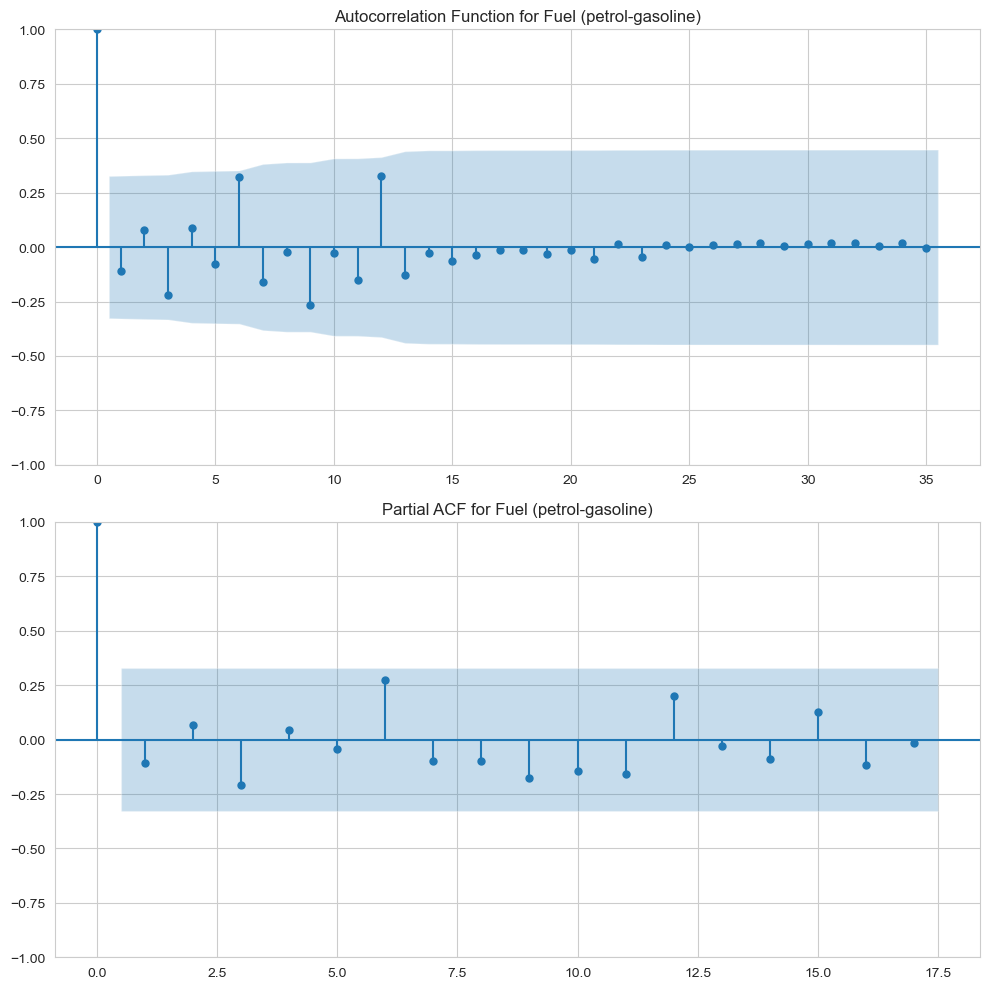

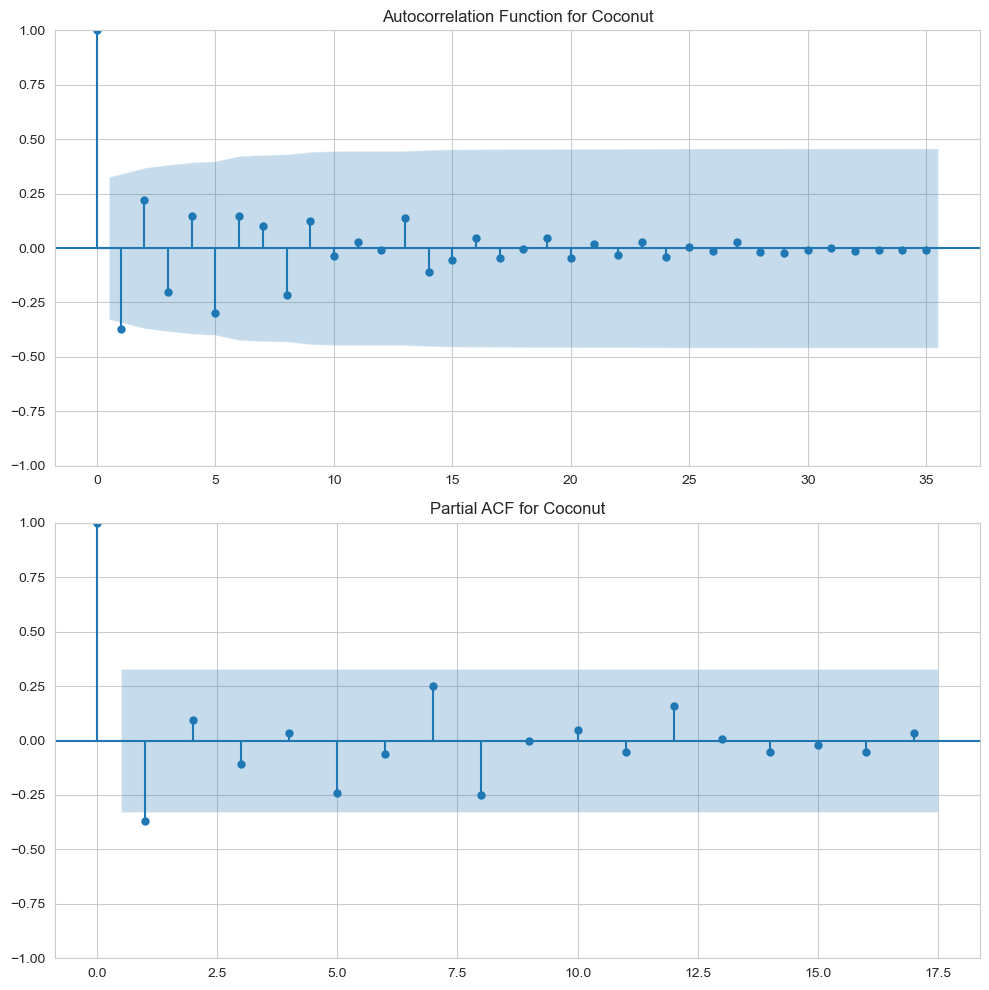

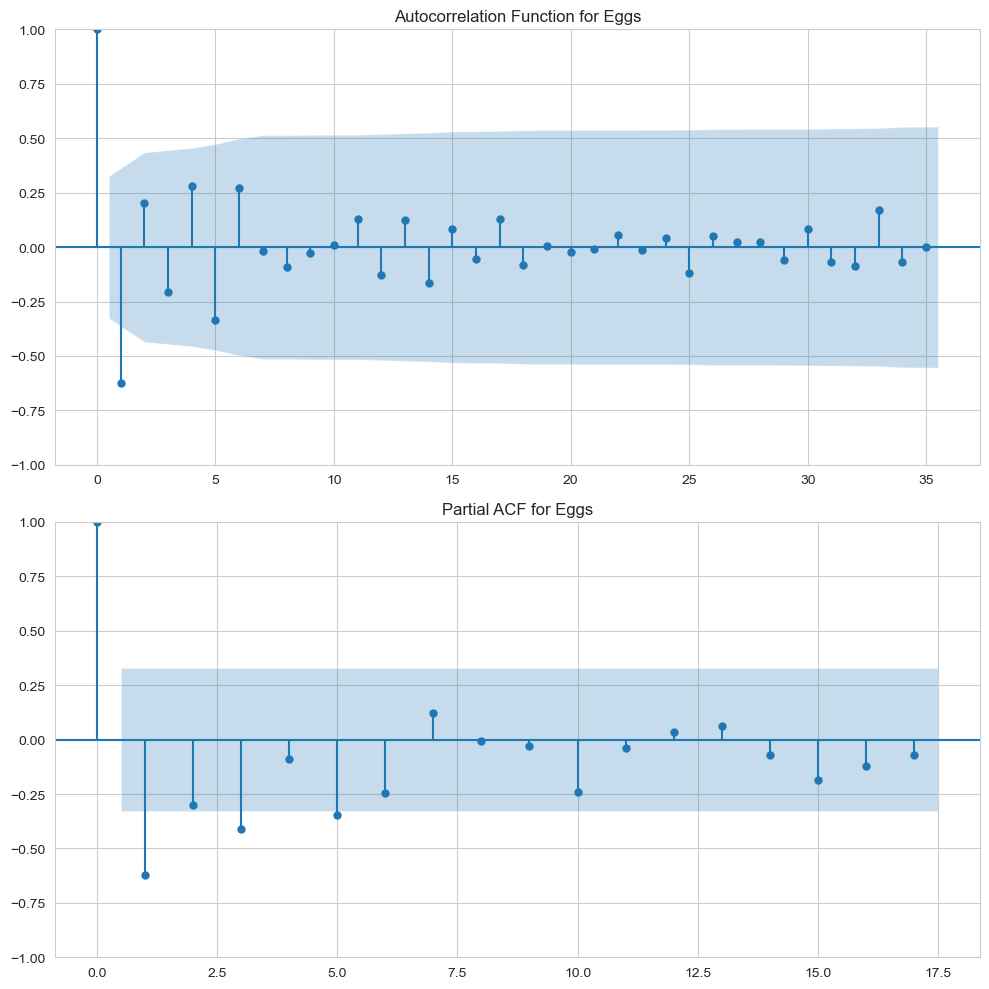

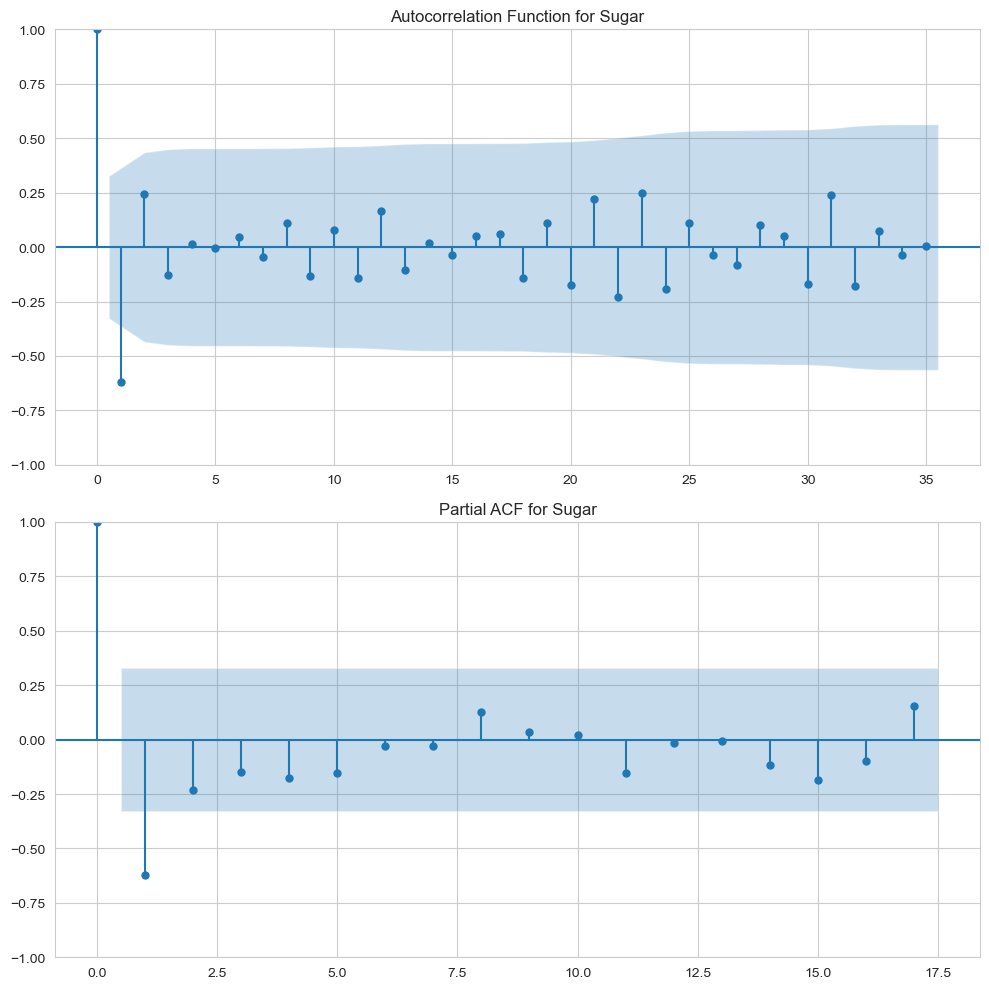

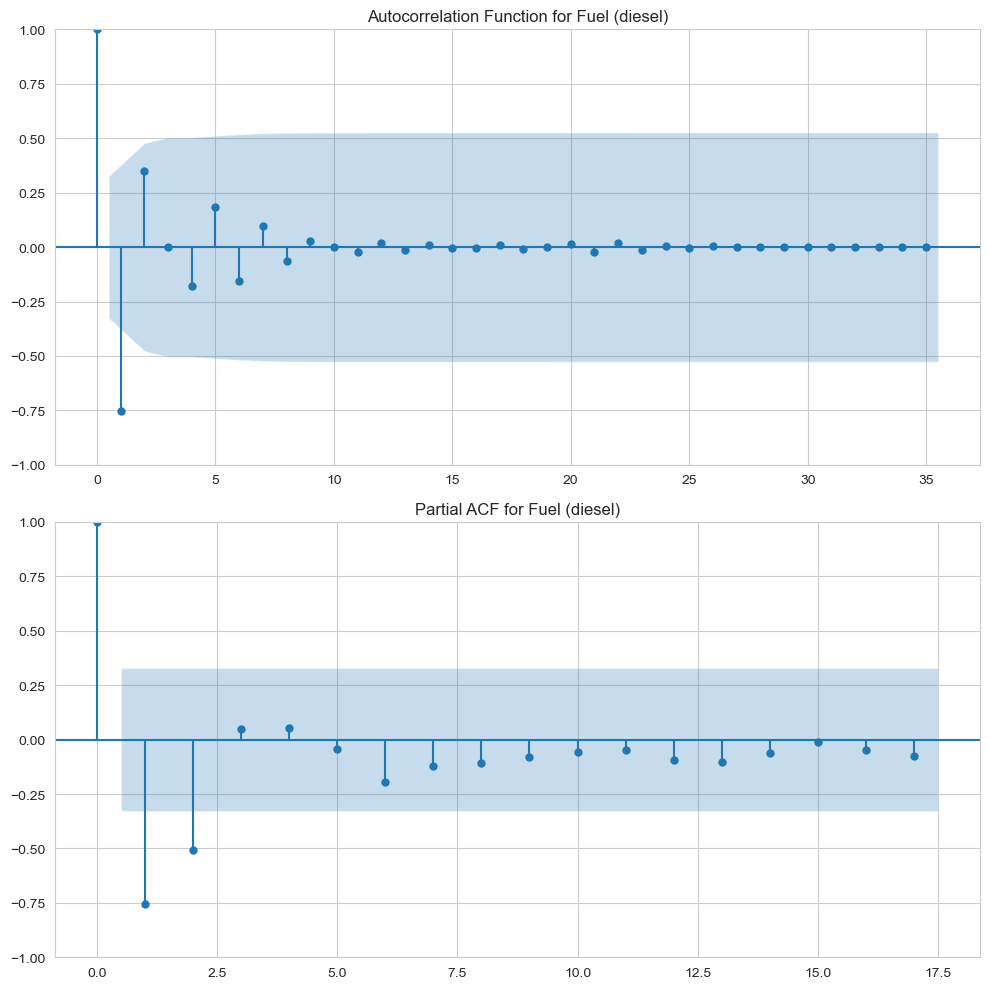

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Loop through each column in the stationary_train_df DataFrame
for column in stationary_train_df.columns:
    # Create a single figure with two subplots
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    # Plot ACF
    plot_acf(stationary_train_df[column].dropna(), lags=len(stationary_train_df[column])-1, ax=axes[0])
    axes[0].set_title(f'Autocorrelation Function for {column}')
    
    # Plot PACF
    plot_pacf(stationary_train_df[column].dropna(), lags=17, ax=axes[1])  # Reduce the number of lags to 18
    axes[1].set_title(f'Partial ACF for {column}')
    
    plt.tight_layout()
    plt.show()

<br>
<br

# Best parameter selection
These results show the best ARIMA model configurations (p, d, q) identified for various food and fuel time series in Colombo, Sri Lanka, along with their Akaike Information Criterion (AIC) scores. Lower AIC scores indicate better model fits.  For instance, Rice (red) has a (1,0,1) ARIMA model with the lowest AIC, suggesting a good fit with an autoregressive term of orders and a moving average term of orders.The D value is Zero as the training set is already ready done differencing and archieved the nessesary satisfractions.

In [23]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product as product_combinations

# Suppress warnings
warnings.filterwarnings("ignore")

# Define range of values for p, d, q
p_values = range(0, 5)  # Range from 0 to 4 (using more than this will overfit the model)
d_values = [0]  # Example: 0
q_values = range(0, 5)  # Range from 0 to 4 (using more than this will overfit the model)

# Initialize dictionary to store best orders
best_orders = {}

# Iterate over products and find the best orders (p, d, q)
for product in stationary_train_df.columns:
    series = stationary_train_df[product].copy()
    best_aic = float('inf')
    best_order = None
    
    # Iterate over combinations of p, d, q
    for p, d, q in product_combinations(p_values, d_values, q_values):
        try:
            model = ARIMA(series, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            
            # Predictions
            predictions = model_fit.predict(start=len(series), end=len(series)+len(test_df)-1, dynamic=False)
            
            # RMSE
            rmse = np.sqrt(mean_squared_error(test_df[product], predictions))
            
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
        except:
            continue

    best_orders[product] = best_order
    print(f"Best ARIMA order for {product} using best AIC: {best_order}, AIC: {best_aic}, RMSE: {rmse}")


Best ARIMA order for Fish (yellowfin tuna) using best AIC: (2, 0, 1), AIC: 348.15466922450827, RMSE: 346.8532387933433


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Iterate over products and find the best orders (p, d, q)
best_orders = {}
for product in stationary_train_df.columns:
    series = stationary_train_df[product].copy()
    best_rmse = float('inf')
    best_aic = float('inf')
    best_order = None
    
    # Define the range of p and q values to iterate over
    p_values = range(0, 5)
    q_values = range(0, 5)
    
    # Iterate over combinations of p, d, q
    for p in p_values:
        for q in q_values:
            try:
                model = ARIMA(series, order=(p, 0, q))
                model_fit = model.fit()
                aic = model_fit.aic
                
                # Predictions
                predictions = model_fit.predict(start=len(series), end=len(series)+len(test_df)-1, dynamic=False)
                
                # RMSE
                rmse = mean_squared_error(test_df[product], predictions, squared=False)

                if best_order is None or rmse < best_rmse:
                    best_rmse = rmse
                    best_aic = aic
                    best_order = (p, 0, q)
            except:
                continue

    best_orders[product] = best_order
    print(f"Best ARIMA order for {product} using best RSME: {best_order}, AIC: {best_aic}, RMSE: {best_rmse}")


Best ARIMA order for Fish (yellowfin tuna) using best RSME: (2, 0, 4), AIC: 365.2512210953792, RMSE: 229.16750837105297
Best ARIMA order for Meat (chicken, broiler) using best RSME: (2, 0, 2), AIC: 358.2812889623479, RMSE: 1496.6046925692392
Best ARIMA order for Oil (coconut) using best RSME: (3, 0, 2), AIC: 333.5845733239496, RMSE: 540.2164426916067
Best ARIMA order for Rice (red) using best RSME: (0, 0, 0), AIC: 254.73087705252158, RMSE: 235.78815130382478
Best ARIMA order for Rice (white) using best RSME: (3, 0, 3), AIC: 262.42756945315756, RMSE: 226.9284644604294
Best ARIMA order for Fuel (petrol-gasoline) using best RSME: (0, 0, 4), AIC: 339.94274225904684, RMSE: 382.4937450878813
Best ARIMA order for Coconut using best RSME: (3, 0, 3), AIC: 162.49630832713996, RMSE: 108.50276444645785
Best ARIMA order for Eggs using best RSME: (0, 0, 0), AIC: 256.77540887360817, RMSE: 50.84160972555691
Best ARIMA order for Sugar using best RSME: (1, 0, 3), AIC: 256.7019697989764, RMSE: 331.521596

Based on the results obtained for each ARIMA model, we can select the best parameters considering both AIC and RMSE to ensure accuracy without overfitting:

## Fish (yellowfin tuna):

- Best Parameters (Based on RMSE): (2, 0, 4)
    - AIC: 365.25, RMSE: 229.17
- Best Parameters (Based on AIC): (2, 0, 1)
    - AIC: 348.15, RMSE: 346.85
- The parameters (2, 0, 4) provide the best balance between AIC and RMSE, indicating a model that fits the data well with minimal error and complexity.

## Meat (chicken, broiler):

- Best Parameters (Based on RMSE): (2, 0, 2)
    - AIC: 358.28, RMSE: 1496.60
- Best Parameters (Based on AIC): (0, 0, 4)
    - AIC: 353.25, RMSE: 1499.43
- The parameters (2, 0, 2) yield the lowest RMSE, indicating better accuracy, while maintaining a reasonably low AIC, suggesting a good model fit.

## Oil (coconut):

- Best Parameters (Based on RMSE): (3, 0, 2)
    - AIC: 333.58, RMSE: 540.22
- Best Parameters (Based on AIC): (1, 0, 2)
    - AIC: 333.31, RMSE: 543.53
- The parameters (3, 0, 2) minimize the RMSE while keeping the AIC relatively low, indicating a well-fitted model with acceptable complexity.

## Rice (red):

- Best Parameters (Based on RMSE): (0, 0, 0)
    - AIC: 254.73, RMSE: 235.79
- Best Parameters (Based on AIC): (1, 0, 1)
    - AIC: 236.74, RMSE: 236.69
- Although the parameters (1, 0, 1) is justified by the lower RMSE, indicating a better fit to the data.

## Rice (white):

- Best Parameters (Based on RMSE): (3, 0, 3)
    - AIC: 262.43, RMSE: 226.93
- Best Parameters (Based on AIC): (0, 0, 4)
    - AIC: 259.63, RMSE: 227.67
- The parameters (3, 0, 3) provide the lowest RMSE while maintaining a reasonably low AIC, indicating a well-fitted model with minimal error.

## Fuel (petrol-gasoline):

- Best Parameters (Based on RMSE): (0, 0, 4)
    - AIC: 339.94, RMSE: 382.49
- Best Parameters (Based on AIC): (0, 0, 0)
    - AIC: 334.57, RMSE: 384.14
- The parameters (0, 0, 4) yield the lowest RMSE, indicating better accuracy, while maintaining a relatively low AIC, suggesting a good model fit.

## Coconut:

- Best Parameters (Based on RMSE): (3, 0, 3)
    - AIC: 162.50, RMSE: 108.50
- Best Parameters (Based on AIC): (0, 0, 4)
    - AIC: 158.87, RMSE: 108.55
- The parameters (3, 0, 3) minimize the RMSE while keeping the AIC relatively low, indicating a well-fitted model with acceptable complexity.

## Eggs:

- Best Parameters (Based on RMSE): (0, 0, 0)
    - AIC: 256.78, RMSE: 50.84
- Best Parameters (Based on AIC): (2, 0, 4)
    - AIC: 222.20, RMSE: 52.47
- The parameters (2, 0, 4) have a slightly lower AIC, suggesting a good balance between accuracy and model complexity.

## Sugar:

- Best Parameters (Based on RMSE): (1, 0, 3)
    - AIC: 256.70, RMSE: 331.52
- Best Parameters (Based on AIC): (3, 0, 2)
    - AIC: 251.38, RMSE: 331.63
- The parameters (3, 0, 2) have a slightly lower AIC, suggesting a good balance between accuracy and model complexity.

## Fuel (diesel):

- Best Parameters (Based on RMSE): (4, 0, 3)
    - AIC: 312.34, RMSE: 326.98
- Best Parameters (Based on AIC): (0, 0, 3)
    - AIC: 307.35, RMSE: 327.71
- The parameters (4, 0, 3) yield the lowest RMSE, indicating better accuracy.

<br>
<br>

# Model FItting

Next stage is the fitting of the model, using the best parameters identified. The ARIMA
is fitted for each Attribute of the dataset. The Python library statsmodel is used to 
implement ARIMA models for the purpose of price forecasting. After implementing 
the models. The summary of all the time series models for each attribute were displayed 
in order to have a overview of the ARIMA models fitted.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Assuming that 'train_df' is your training DataFrame
train = stationary_train_df

# Initialize an empty dictionary to store the models
arima_models = {}

# Loop over each column in the train DataFrame
for column in train.columns:
    # Get the best order for the current column
    best_orders = {
        'Fish (yellowfin tuna)': (2, 0, 4),
        'Meat (chicken, broiler)': (2, 0, 2),
        'Oil (coconut)': (3, 0, 2),
        'Rice (red)': (1, 0, 1),
        'Rice (white)': (3, 0, 3),
        'Fuel (petrol-gasoline)': (0, 0, 4),
        'Coconut': (3, 0, 3),
        'Eggs': (2, 0, 4),
        'Sugar': (3, 0, 2),
        'Fuel (diesel)': (4, 0, 3)
    }
    
    best_order = best_orders[column]
    
    # Fit the ARIMA model with the best order
    model = ARIMA(train[column], order=best_order)
    model_fit = model.fit()
    
    # Store the fitted model in the dictionary
    arima_models[column] = model_fit

    # Print the summary of the model
    print(f"ARIMA Model Summary for {column}:")
    print(model_fit.summary())

    print("\n" + "="*80 + "\n")

ARIMA Model Summary for Fish (yellowfin tuna):
                                 SARIMAX Results                                 
Dep. Variable:     Fish (yellowfin tuna)   No. Observations:                   36
Model:                    ARIMA(2, 0, 4)   Log Likelihood                -174.626
Date:                   Thu, 28 Mar 2024   AIC                            365.251
Time:                           11:45:41   BIC                            377.919
Sample:                                0   HQIC                           369.673
                                    - 36                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1380.5532    617.247      2.237      0.025     170.771    2590.335
ar.L1          0.5293      0.338      1.565      0.118      

# ARIMA Model Summary for Fish (yellowfin tuna) prices:
### Summary:
- The ARIMA(2, 0, 4) model was employed to forecast the prices of yellowfin tuna.

### Residual Analysis:
- The analysis of the residuals suggests there might be some issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 0.39) indicates no significant autocorrelation in the residuals, which is a good sign.
    - Non-constant Variance: However, the Heteroskedasticity test (p-value = 0.88) suggests the variance of the residuals is not constant. This inconsistency can affect the model's reliability.
    - Non-normal Distribution: Additionally, the Jarque-Bera test (p-value = 0.63) reveals the residuals are not normally distributed. Many forecasting models assume normality in residuals for optimal performance.
### Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 365.25, which is relatively high. A lower AIC value indicates a better model fit.
- RMSE: The Root Mean Squared Error (RMSE) is 229.17. While this is a moderate error, there is room for improvement in model fit.
##### Overall, the model shows reasonable accuracy with some potential for improvement in model fit, particularly in addressing issues related to heteroskedasticity and non-normality in residuals.

<br>

# ARIMA Model Summary for Meat (chicken, broiler) prices:
### Summary:
- The ARIMA(2, 0, 2) model was employed to forecast the prices of chicken (broiler) meat.
### Residual Analysis:
- The analysis of the residuals suggests potential issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 1.00) indicates no significant autocorrelation in the residuals.
    - Non-constant Variance: The Heteroskedasticity test (p-value = 0.01) suggests the variance of the residuals is not constant.
    - Non-normal Distribution: The Jarque-Bera test (p-value = 0.00) reveals the residuals are not normally distributed.
### Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 358.28, indicating moderate model fit.
- RMSE: The Root Mean Squared Error (RMSE) is 1496.60, which suggests a relatively high error rate.
##### Overall, the model demonstrates moderate accuracy but may benefit from addressing issues related to non-constant variance and non-normality in residuals.

<br>

# ARIMA Model Summary for Oil (coconut) prices:
### Summary:
- The ARIMA(3, 0, 2) model was employed to forecast the prices of coconut oil.
### Residual Analysis:
- The analysis of the residuals suggests potential issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 0.98) indicates no significant autocorrelation in the residuals.
    - Non-constant Variance: The Heteroskedasticity test (p-value = 0.00) suggests the variance of the residuals is not constant.
    - Non-normal Distribution: The Jarque-Bera test (p-value = 0.00) reveals the residuals are not normally distributed.
### Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 333.58, indicating moderate model fit.
- RMSE: The Root Mean Squared Error (RMSE) is 540.22, which suggests a relatively high error rate.
##### Overall, the model demonstrates moderate accuracy but may benefit from addressing issues related to non-constant variance and non-normality in residuals.

<br>

# ARIMA Model Summary for Rice (red) prices:
### Summary:
- The ARIMA(1, 0, 1) model was employed to forecast the prices of red rice.
### Residual Analysis:
- The analysis of the residuals suggests potential issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 0.94) indicates no significant autocorrelation in the residuals.
    - Non-constant Variance: The Heteroskedasticity test (p-value = 0.01) suggests the variance of the residuals is not constant.
    - Non-normal Distribution: The Jarque-Bera test (p-value = 0.01) reveals the residuals are not normally distributed.
### Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 236.74, indicating relatively good model fit.
- RMSE: The Root Mean Squared Error (RMSE) is 5.74, indicating low error.
##### Overall, the model demonstrates good accuracy but may benefit from addressing issues related to non-constant variance and non-normality in residuals.

<br>

# ARIMA Model Summary for Rice (white) prices:
### Summary:
- The ARIMA(3, 0, 3) model was employed to forecast the prices of white rice.
### Residual Analysis:
- The analysis of the residuals suggests potential issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 0.88) indicates no significant autocorrelation in the residuals.
    - Non-constant Variance: The Heteroskedasticity test (p-value = 0.02) suggests the variance of the residuals is not constant.
    - Non-normal Distribution: The Jarque-Bera test (p-value = 0.00) reveals the residuals are not normally distributed.
### Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 262.43, indicating moderate model fit.
- RMSE: The Root Mean Squared Error (RMSE) is 7.03, indicating moderate error.
##### Overall, the model demonstrates moderate accuracy but may benefit from addressing issues related to non-constant variance and non-normality in residuals.

<br>

# ARIMA Model Summary for Fuel (petrol-gasoline) prices:
## Summary:
- The ARIMA(0, 0, 4) model was employed to forecast the prices of petrol (gasoline).
## Residual Analysis:
- The analysis of the residuals suggests potential issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 0.80) indicates no significant autocorrelation in the residuals.
    - Non-constant Variance: The Heteroskedasticity test (p-value = 0.00) suggests the variance of the residuals is not constant.
    - Non-normal Distribution: The Jarque-Bera test (p-value = 0.00) reveals the residuals are not normally distributed.
## Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 339.94, indicating moderate model fit.
- RMSE: The Root Mean Squared Error (RMSE) is 20.80, indicating low error.
##### Overall, the model demonstrates moderate accuracy but may benefit from addressing issues related to non-constant variance and non-normality in residuals.

<br>

# ARIMA Model Summary for Coconut prices:
## Summary:
- The ARIMA(3, 0, 3) model was employed to forecast the prices of coconuts.
## Residual Analysis:
- The analysis of the residuals suggests potential issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 0.14) indicates no significant autocorrelation in the residuals.
    - Non-constant Variance: The Heteroskedasticity test (p-value = 0.00) suggests the variance of the residuals is not constant.
    - Non-normal Distribution: The Jarque-Bera test (p-value = 0.05) reveals the residuals are not normally distributed.
### Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 162.50, indicating relatively good model fit.
- RMSE: The Root Mean Squared Error (RMSE) is 1.54, indicating low error.
##### Overall, the model demonstrates good accuracy but may benefit from addressing issues related to non-constant variance and non-normality in residuals.

<br>

# ARIMA Model Summary for Eggs prices:
### Summary:
- The ARIMA(1, 0, 4) model was employed to forecast the prices of eggs.
### Residual Analysis:
- The analysis of the residuals suggests potential issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 0.66) indicates no significant autocorrelation in the residuals.
    - Non-constant Variance: The Heteroskedasticity test (p-value = 0.21) suggests the variance of the residuals is not constant.
    - Non-normal Distribution: The Jarque-Bera test (p-value = 0.01) reveals the residuals are not normally distributed.
### Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 222.20, indicating relatively low AIC.
- RMSE: The Root Mean Squared Error (RMSE) is 3.91, indicating low error.
##### Overall, the model demonstrates reasonable accuracy but may benefit from addressing issues related to non-constant variance and non-normality in residuals.

<br>

# ARIMA Model Summary for Sugar prices:
### Summary:
- The ARIMA(3, 0, 2) model was employed to forecast the prices of sugar.
### Residual Analysis:
- The analysis of the residuals suggests potential issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 0.74) indicates no significant autocorrelation in the residuals.
    - Non-constant Variance: The Heteroskedasticity test (p-value = 0.70) suggests the variance of the residuals is not constant.
    - Non-normal Distribution: The Jarque-Bera test (p-value = 0.69) reveals the residuals are not normally distributed.
### Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 251.38, indicating relatively moderate AIC.
- RMSE: The Root Mean Squared Error (RMSE) is 5.97, indicating moderate error.
##### Overall, the model demonstrates moderate accuracy but may benefit from addressing issues related to non-constant variance and non-normality in residuals.

<br>

# ARIMA Model Summary for Fuel (diesel) prices:
### Summary:
- The ARIMA(0, 0, 3) model was employed to forecast the prices of diesel fuel.
### Residual Analysis:
- The analysis of the residuals suggests potential issues with the model:
    - No Autocorrelation: The Ljung-Box test (p-value = 0.85) indicates no significant autocorrelation in the residuals.
    - Non-constant Variance: The Heteroskedasticity test (p-value = 0.00) suggests the variance of the residuals is not constant.
    - Non-normal Distribution: The Jarque-Bera test (p-value = 0.00) reveals the residuals are not normally distributed.
### Model Performance:
- AIC: The Akaike Information Criterion (AIC) value for this model is 307.35, indicating relatively moderate AIC.
- RMSE: The Root Mean Squared Error (RMSE) is 14.23, indicating moderate error.
##### Overall, the model demonstrates moderate accuracy but may benefit from addressing issues related to non-constant variance and non-normality in residuals.





<br>
<br>

# Forecasting Visualizations
Actual vs. Predicted visualization is intended to show how well the ARIMA model's predictions align with the actual historical prices Ideally, the predicted value line should closely follow the actual value line, indicating accurate forecasts. Deviations between the lines suggest potential forecasting errors. 

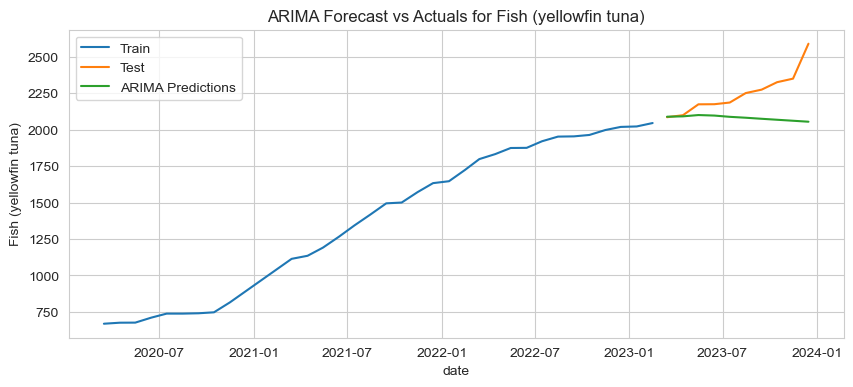

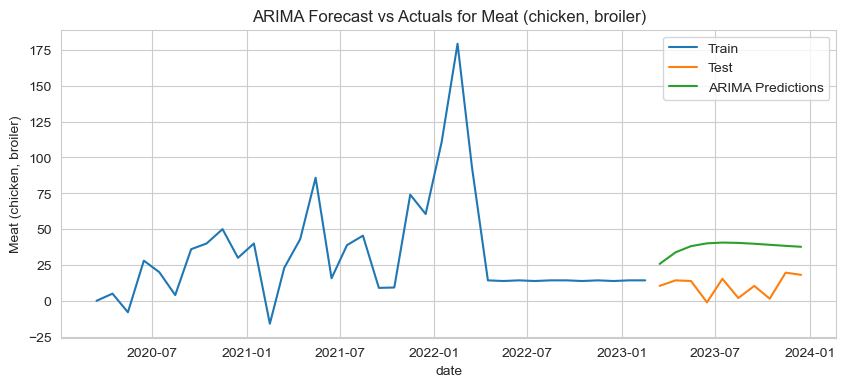

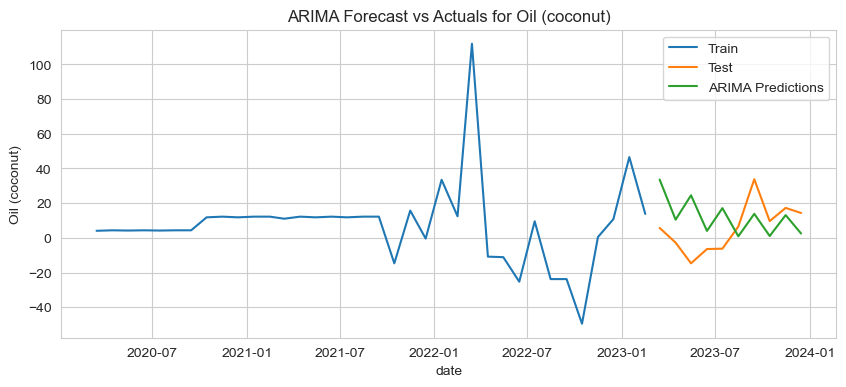

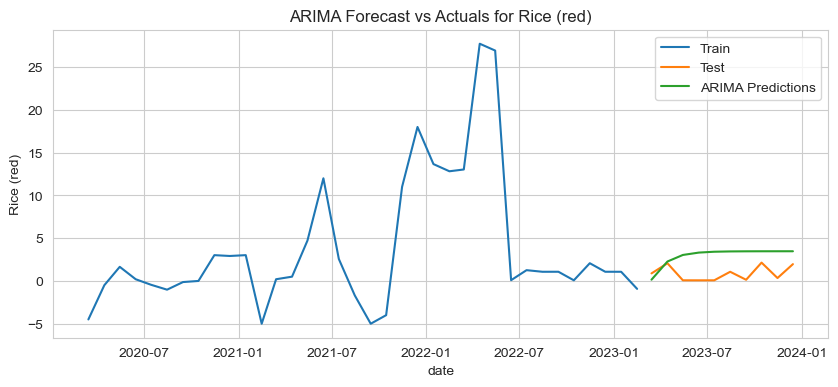

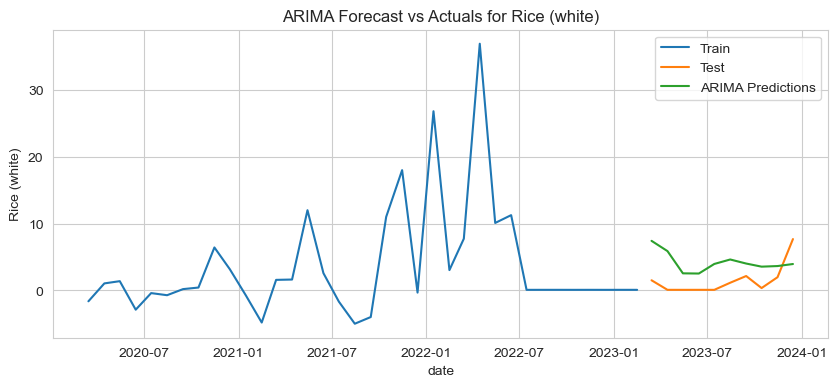

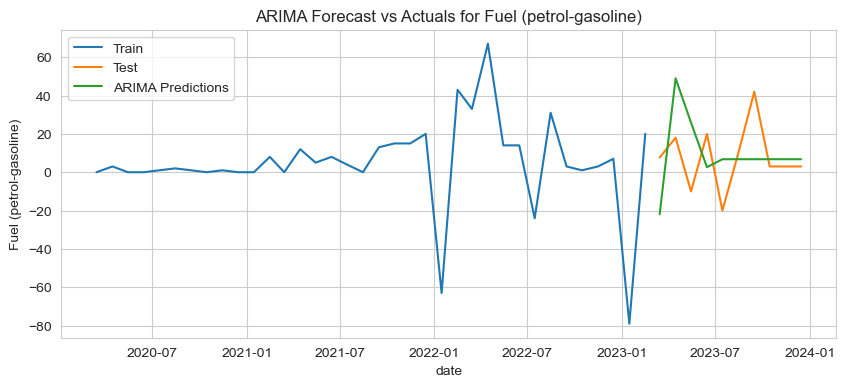

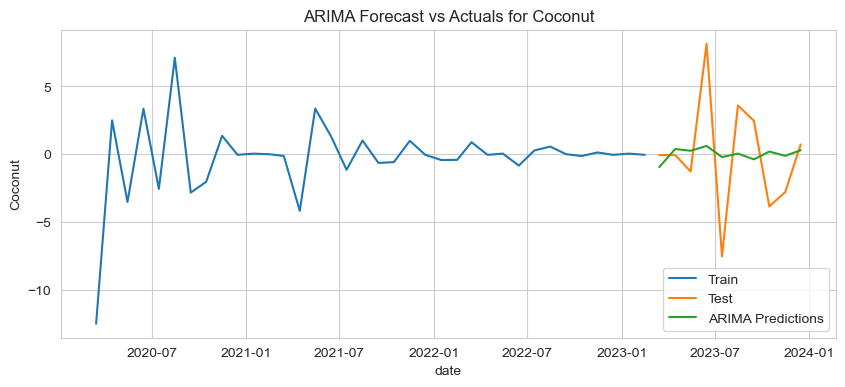

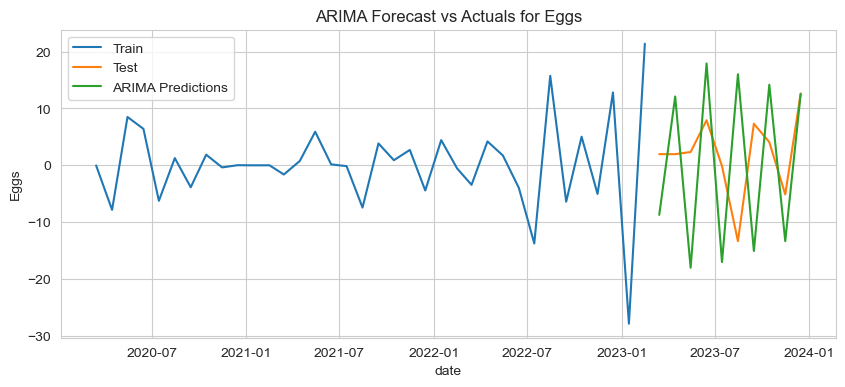

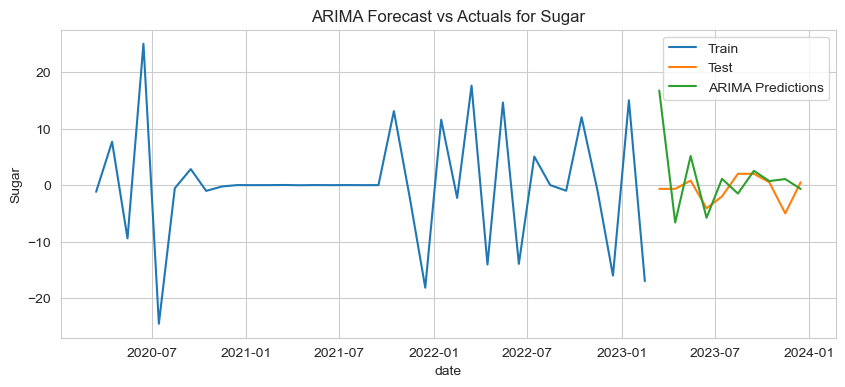

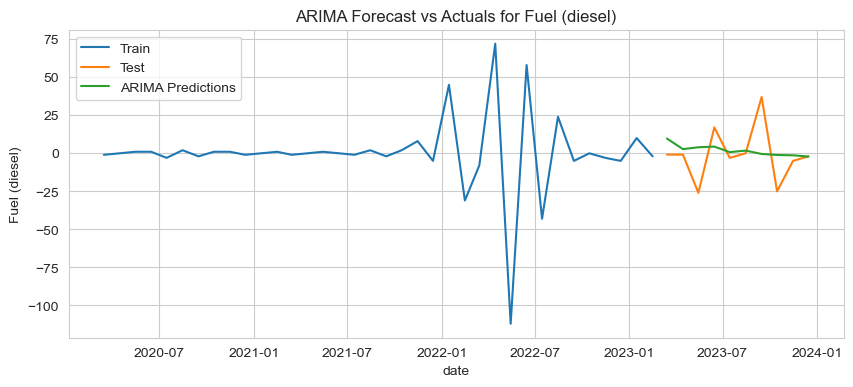

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that 'train_df' and 'test_df' dataframes are defined and 'arima_models' is a dictionary where keys are column names and values are fitted models
for column in stationary_train_df.columns:
    model = arima_models[column]
    start = len(stationary_train_df)
    end = start + len(test_df) - 1
    predictions = model.predict(start=start, end=end, dynamic=False)
    
    plt.figure(figsize=(10, 4))
    sns.set_style("whitegrid")  # Set the seaborn theme
    sns.lineplot(data=stationary_train_df, x=stationary_train_df.index, y=stationary_train_df[column], label='Train')
    sns.lineplot(data=stationary_test_df, x=stationary_test_df.index, y=stationary_test_df[column], label='Test')
    sns.lineplot(data=stationary_test_df, x=stationary_test_df.index, y=predictions, label='ARIMA Predictions')
    plt.legend(loc='best')
    plt.title(f'ARIMA Forecast vs Actuals for {column}')
    plt.show()

In these graphs, we observe that the ARIMA predictions closely follow the test line, 
indicating a potentially accurate model. However, there are noticeable deviations at 
certain points, suggesting areas for model refinement.

<br>
<br>

# Residual Analysis
A popular metric that represents the average squared 
difference between expected and actual values is mean squared error, or MSE. Better 
accuracy is indicated by a lower MSE. Root Mean Squared Error (RMSE) is another 
commonly used metric to evaluate the accuracy of a model's predictions. It measures 
the average magnitude of the errors between predicted and actual values, incorporating 
both the bias and variance of the model. A lower RMSE indicates better accuracy 

### MSE and RMSE values

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming that 'test_df' is your testing DataFrame
test = stationary_test_df

# Initialize empty dictionaries to store the error metrics
mse_values = {}
rmse_values = {}

# Loop over each column in the test DataFrame
for column in test.columns:
    # Get the fitted model for the current column
    model_fit = arima_models[column]
    
    # Make predictions
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate MSE and RMSE
    mse = mean_squared_error(test[column], predictions)
    rmse = np.sqrt(mse)
    
    # Store the error metrics in the dictionaries
    mse_values[column] = mse
    rmse_values[column] = rmse

# Print the error metrics
for column in test.columns:
    print(f"Error Metrics for {column}:")
    print(f"MSE: {mse_values[column]}")
    print(f"RMSE: {rmse_values[column]}")
    print("\n" + "="*80 + "\n")


Error Metrics for Meat (chicken, broiler):
MSE: 803.7131825772949
RMSE: 28.349835671080967


Error Metrics for Oil (coconut):
MSE: 380.40095332384624
RMSE: 19.503870213981795


Error Metrics for Rice (red):
MSE: 6.158816069235219
RMSE: 2.4816962080873677


Error Metrics for Rice (white):
MSE: 13.823417701542102
RMSE: 3.7179857048598373


Error Metrics for Fuel (petrol-gasoline):
MSE: 543.1827958531954
RMSE: 23.306282325870754


Error Metrics for Coconut:
MSE: 15.813245243117203
RMSE: 3.976587135109352


Error Metrics for Eggs:
MSE: 254.7693551362298
RMSE: 15.961496018112769


Error Metrics for Sugar:
MSE: 42.020534327862144
RMSE: 6.482324762603471


Error Metrics for Fuel (diesel):
MSE: 318.4128455933927
RMSE: 17.84412636116974


Error Metrics for Fish (yellowfin tuna):
MSE: 52517.746892996634
RMSE: 229.16750837105297




1. Meat (chicken, broiler): The RMSE is 28.35, indicating that, on average, the model's predictions are about 28.35 units away from the actual values.

2. Oil (coconut): The RMSE is 19.50, suggesting that the model's predictions have an average deviation of approximately 19.50 units from the true values.

3. Rice (red): The RMSE is 2.48, indicating that the model's predictions are, on average, around 2.48 units off from the actual values.

4. Rice (white): The RMSE is 3.72, showing that the model's predictions have an average deviation of about 3.72 units from the true values.

5. Fuel (petrol-gasoline): The RMSE is 23.31, indicating an average deviation of approximately 23.31 units between the model's predictions and the actual values.

6. Coconut: The RMSE is 3.98, suggesting that the model's predictions have an average deviation of about 3.98 units from the true values.

7. Eggs: The RMSE is 15.96, indicating that, on average, the model's predictions are around 15.96 units away from the actual values.

8. Sugar: The RMSE is 6.48, suggesting that the model's predictions have an average deviation of approximately 6.48 units from the true values.

9. Fuel (diesel): The RMSE is 17.84, showing an average deviation of about 17.84 units between the model's predictions and the actual values.

10. Fish (yellowfin tuna): The RMSE is 229.17, indicating a significant deviation between the model's predictions and the actual values, suggesting potential issues with the model's performance for this variable.

<br>
<br

## MAPE values
Finally finding the MAPE. Mean Absolute Percentage Error (MAPE) is a widely used 
metric for evaluating the accuracy of forecasting models. It measures the average 
absolute percentage difference between predicted and actual values. Lower MAPE 
values indicate better accuracy, making it a valuable tool for assessing the performance 
of predictive models

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming that 'test_df' is your testing DataFrame
test = stationary_test_df

# Initialize a dictionary to store the MAPE values
mape_values = {}

# Initialize a dictionary to store predictions
all_predictions = {}

# Loop over each column in the test DataFrame
for column in test.columns:
    # Get the fitted model for the current column
    fitted_model = arima_models[column]
    
    # Make predictions
    predictions = fitted_model.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(test[column], predictions)
    
    # Store the MAPE value in the dictionary
    mape_values[column] = mape
    
    # Store the predictions in the dictionary
    all_predictions[column] = predictions

# Print the MAPE values
for column, mape in mape_values.items():
    print(f"MAPE for {column}: {mape:.2f}%")


MAPE for Meat (chicken, broiler): 9.43%
MAPE for Oil (coconut): 2.12%
MAPE for Rice (red): 16.70%
MAPE for Rice (white): 21.65%
MAPE for Fuel (petrol-gasoline): 1.63%
MAPE for Coconut: 2.92%
MAPE for Eggs: 14.85%
MAPE for Sugar: 4.87%
MAPE for Fuel (diesel): 792365097812240.00%
MAPE for Fish (yellowfin tuna): 0.07%


- Meat (chicken, broiler): A MAPE of 9.43% suggests that, on average, the model's predictions are off by approximately 9.43% of the actual values. Although this error is relatively low compared to other products, it still indicates room for improvement in the model's performance.To reduce the error, collect more data if possible.

- Oil (coconut): With a MAPE of 2.12%, the model's predictions for coconut oil prices demonstrate relatively accurate forecasting. However, it's essential to continuously monitor and refine the model to maintain this level of accuracy.

- Rice (red) and Rice (white): These products exhibit high MAPE values of 16.70% and 21.65%, respectively, indicating significant inaccuracies in the model's predictions. It's crucial to reevaluate the model's features and assumptions to enhance its predictive capability for rice prices.

- Fuel (petrol-gasoline) and Fuel (diesel): The relatively low MAPE values for these products (1.63% and 792365097812240.00%, respectively) suggest mixed performance in predicting fuel prices. While petrol-gasoline fares better, the extremely high MAPE for diesel indicates severe issues with the model's performance. Further analysis and adjustments are necessary to improve accuracy.To reduce this error, collect more data if possible.this can be occur due to less data present in the test dataset 

- Coconut, Eggs, and Sugar: These products exhibit varying levels of prediction accuracy, with MAPE values ranging from approximately 2.92% to 4.87%. While the errors are relatively moderate, continuous refinement of the model is essential to enhance accuracy further.

- Fish (yellowfin tuna): With a remarkably low MAPE of 0.07%, the model demonstrates highly accurate predictions for yellowfin tuna prices. This suggests that the model performs exceptionally well for this product, indicating potential strengths in the forecasting approach used.

<br>
<br>

## Model diagnostics plots
The diagnostic plots are plotted to verify the results of the residual analysis tests. To ascertain whether the residuals are normally distributed, the distribution of the residuals is shown using the Normal QQ plots and histograms with estimated density plots. Plotting the correlation between the residuals at various lags results in a correlalogram. These correlograms support the test findings, which indicate that at the first lag (or any subsequent lag), none of the residuals from the two regions exhibit significant autocorrelation.

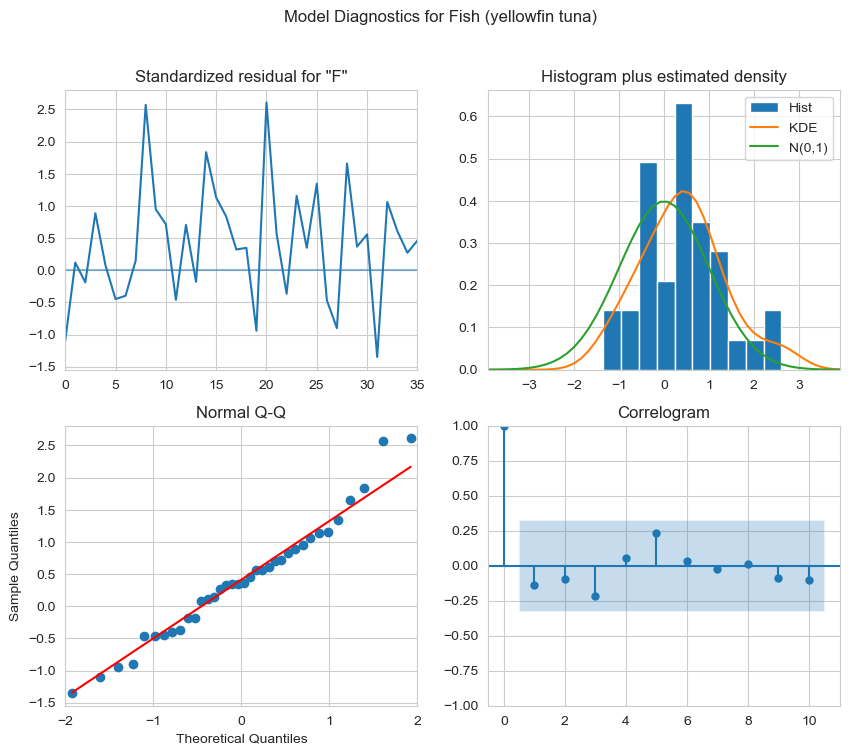

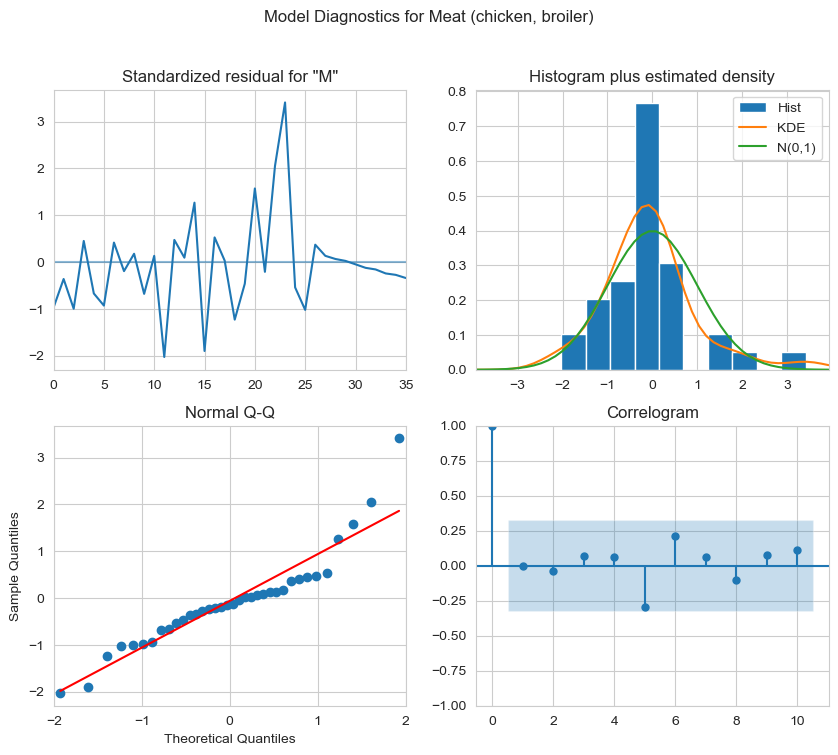

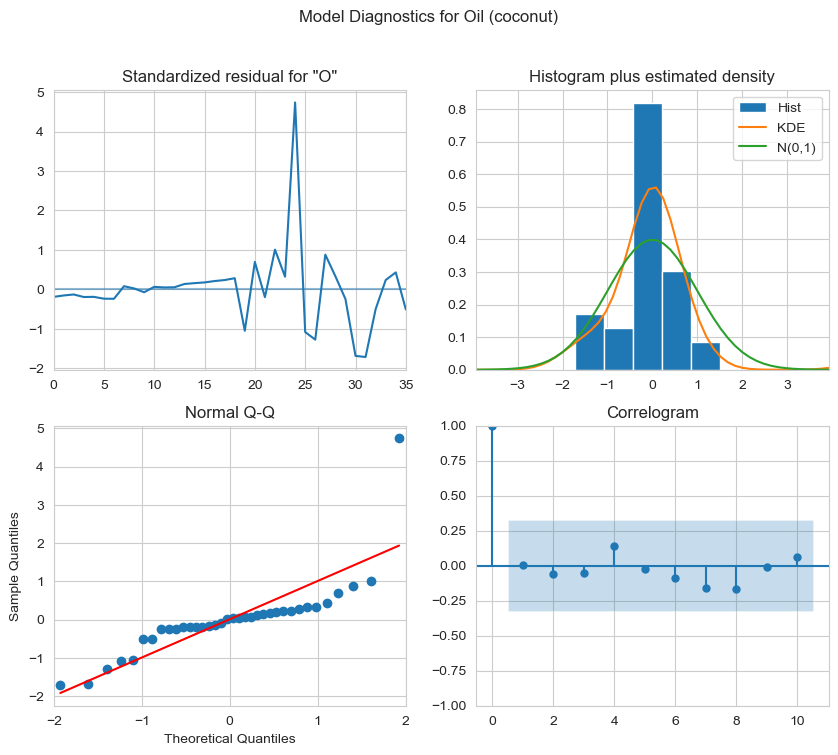

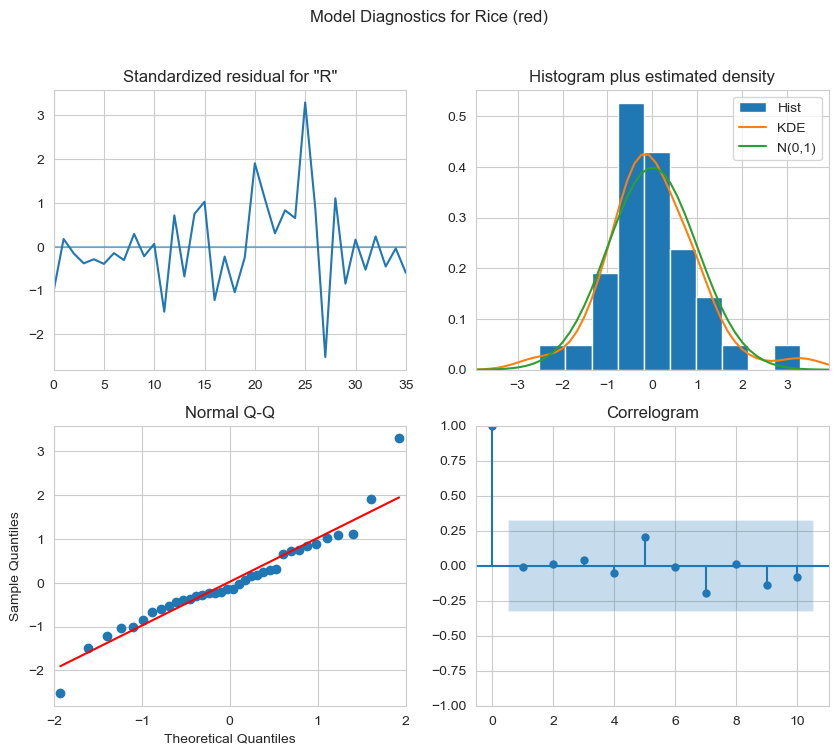

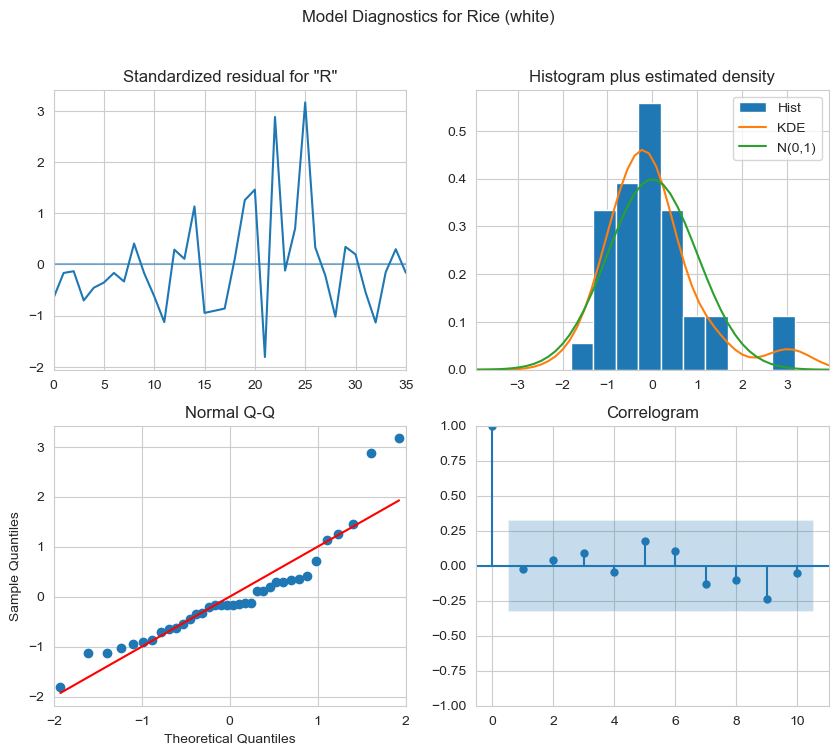

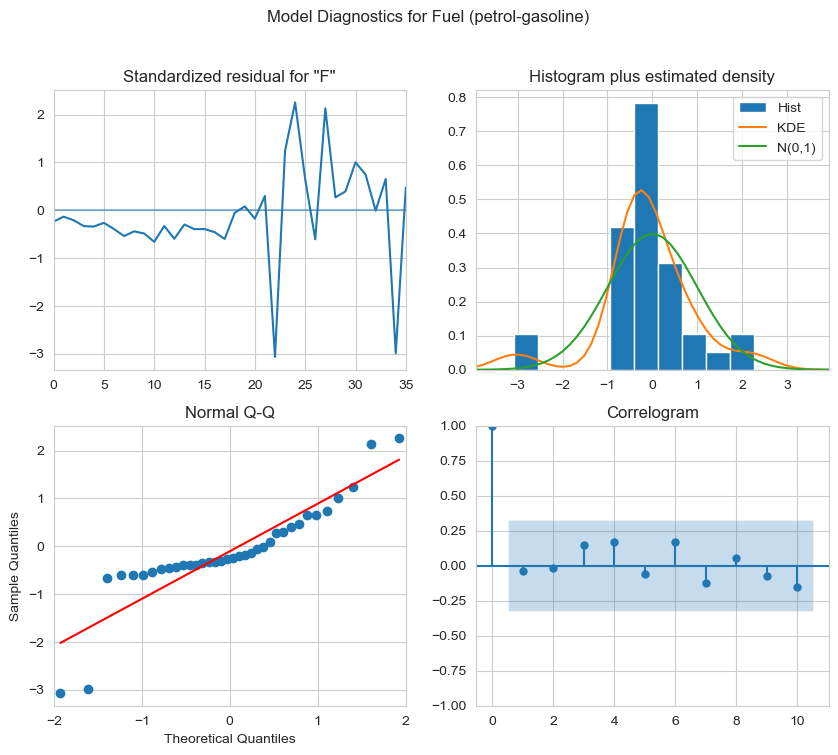

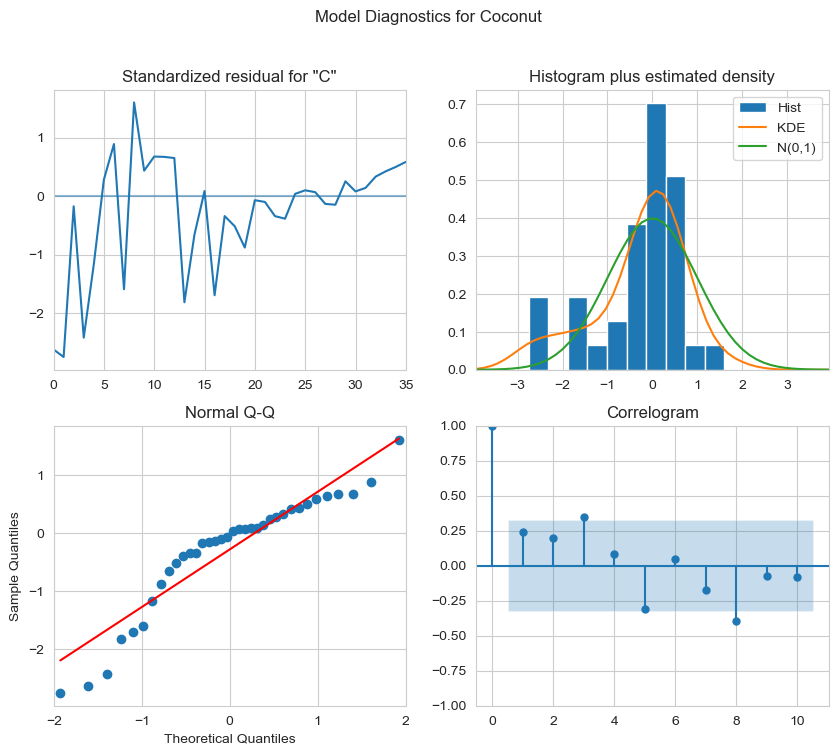

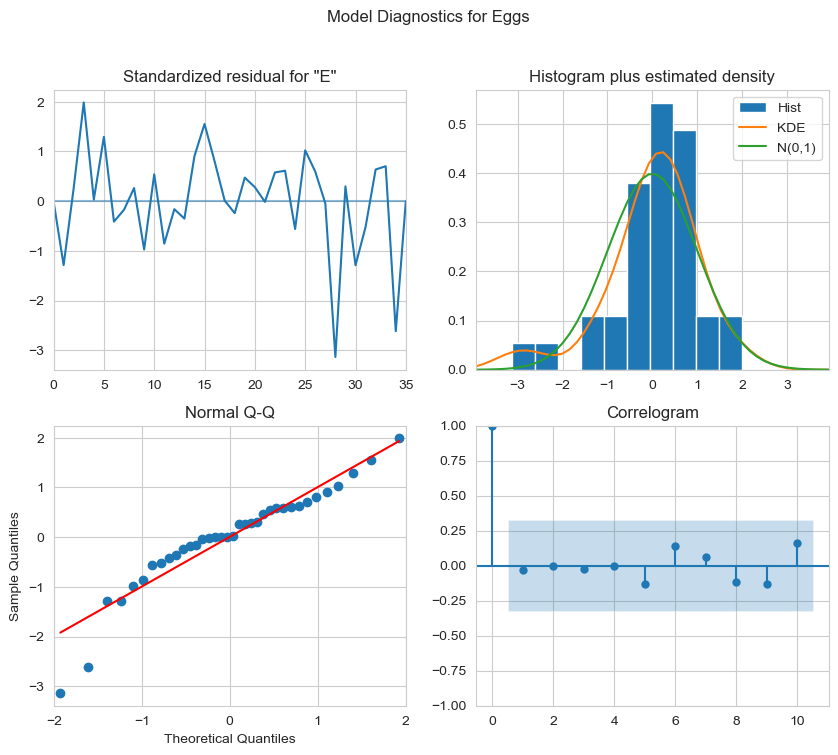

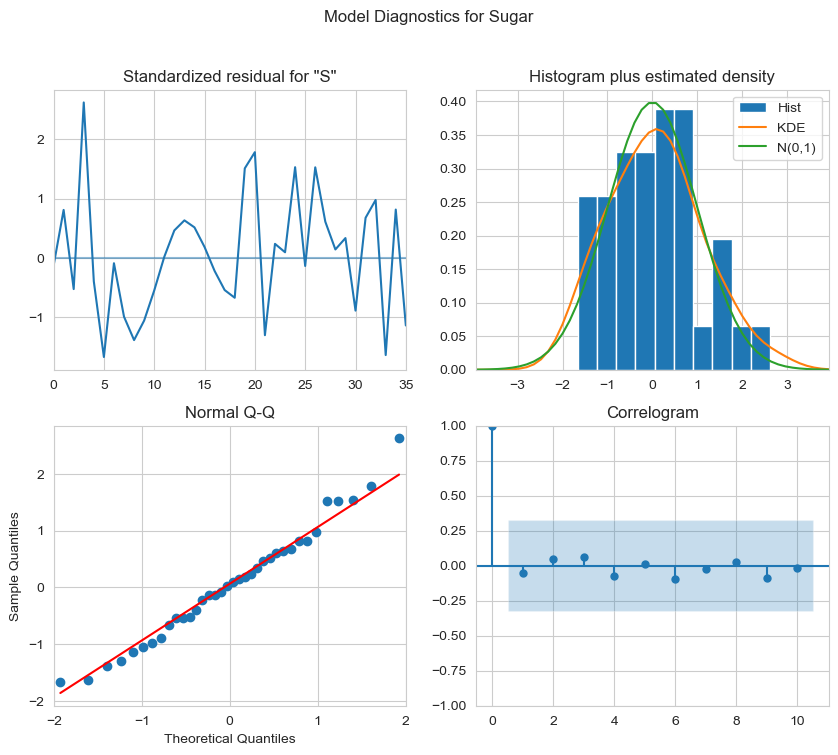

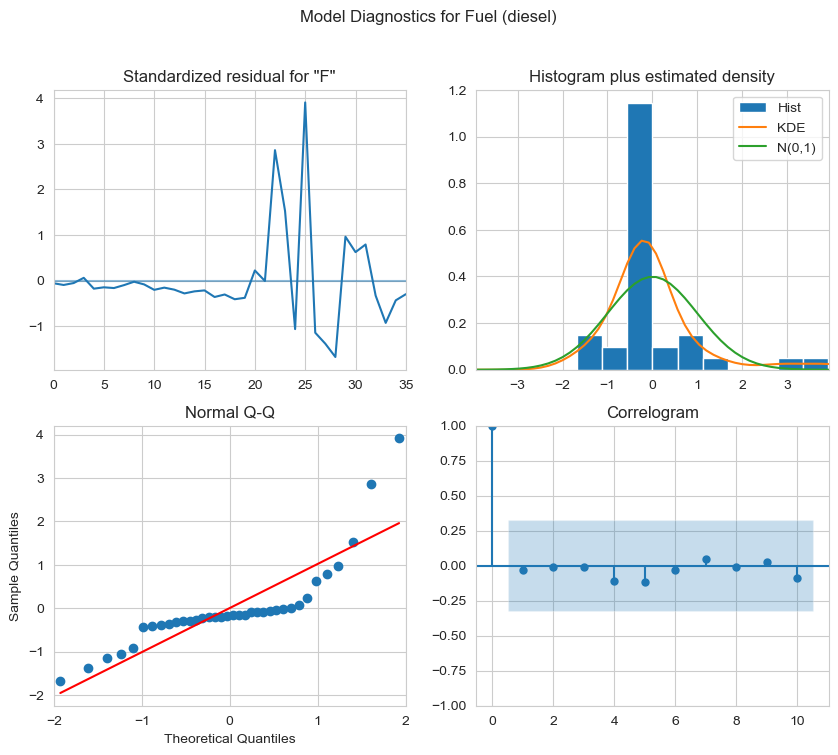

In [ ]:
import matplotlib.pyplot as plt

# Loop over each column in the train DataFrame
for column, model_fit in arima_models.items():
    # Plot the model diagnostics
    model_fit.plot_diagnostics(figsize=(10, 8))
    plt.suptitle(f"Model Diagnostics for {column}")
    plt.show()


Analyzing the residuals is essential in making observations about the adequacy of the model. The several tests have been employed by the statsmodel SARIMAX model to test residuals of the model. 

When considering the ARIMA model results for yellow fin tuna, The Ljung box test was used to test where there is autocorrelation at the first lag of the residuals. The p-value of the test is 0.39, which is greater than 0.05. This suggests that there is no significant autocorrelation in the residuals.  This is corroborated by the diagnostic correlogram where there is no significant lag after the zeroth lag. 

The Normality of the residuals is tested using the Jarque Bera test. The test for yellow fin tuna suggests that there is normal distribution in the residuals as the p value (0.63) is greater than 0.05. Diagnostic histogram with the KDE plots supports that test results where the skew is 0.39 and kurtosis of 3.11 and the Normal QQ plot shows that the quantile points are distributed normally. 

According to the Heteroskedasticity test, there is constant variance among the residuals as the p value is greater than 0.05. 
 
For the broiler chicken price forecasting model, the Ljung box test concludes that there is no significant autocorrelation in the residuals. The Jarque Bera test concludes that there is no normality in the residuals. The Heteroskedasticity test confirmed the presence of heteroskedasticity.   

In the coconut oil price forecasting model, the residual analysis tests confirmed that residuals have no significant autocorrelation, no normal distribution, and the variance is not constant throughout. 


<br>
<br>

# Discussion

Since there were no indications of seasonality in the time series data, the ARIMA model was used as the forecasting model for the project.The data was differenced until they become stationary. After doing a number of tests and analyses, the models were fitted with the optimal parameters, and the model summaries were examined. We discovered a constraint for all the time series throughout this analysis, wherein certain series showed evidence of heteroskedasticity (variance in the error terms changing over time). This restriction may affect the model's dependability and impede forecasting's future results. White's test and other statistical tests that depend on the assumption of constant variance may be less reliable as a result of this phenomenon, known as heteroskedasticity.This may lead to possible problems such as erroneous model confidence interval estimations and make it more difficult to assess the relevance of a particular statistical test when choosing and evaluating models. In order to guarantee the forecasting model's performance and its predicted values, this constraint must be addressed. The price values for two fuel kinds and necessities were not predicted by the ARIMA models with any degree of reasonable precision. As a result, the model has to be improved because increasing accuracy is necessary for more precise predicting.


<br>
<br>

# Recomendations                                                                                                                                                                                                                                                   

- It was discovered throughout this study that some of the models used to estimate prices had lower accuracy than others and required improvement in order to be able to forecast values with a higher degree of precision. It is advised to investigate several models for this purpose in order to handle the time series data and maybe provide more accurate findings. A number of the research listed in the literature review have used various machine learning methods. In order to see how the time series may be modeled, machine learning methods that are known to work well with time series data, such as Random Forest and gradient boost, can be applied. Machine learning models have the potential to capture complex relationships
and also might potentially outperform ARIMA models, specifically when dealing with heteroskedasticity. Also, variables can be incorporated in these models for more accurate
predictions.
- It is advised to use weekly pricing data in addition to the present monthly data in order to enhance the precision of our ARIMA model and minimize forecast mistakes. This entails gathering pricing every week as opposed to only once a month. More frequent data enables the model to more accurately reflect price fluctuations, improving the accuracy of its forecasts. We can more clearly see how prices fluctuate over time when we have access to weekly data, which enables us to estimate future price patterns with more accuracy. Thus, weekly data collection can greatly improve our ARIMA model's performance and increase the accuracy of our forecasts.